# Sagemaker notebook role setting

In [1]:
from sagemaker import get_execution_role

strSageMakerRoleName = get_execution_role().rsplit('/', 1)[-1]
print (f"SageMaker Execution Role Name: {strSageMakerRoleName}")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
SageMaker Execution Role Name: AmazonSageMaker-ExecutionRole-20240423T074145


# Module auto reload

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import sys, os

def add_python_path(module_path):
    if os.path.abspath(module_path) not in sys.path:
        sys.path.append(os.path.abspath(module_path))
        print(f"python path: {os.path.abspath(module_path)} is added")
    else:
        print(f"python path: {os.path.abspath(module_path)} already exists")
    print("sys.path: ", sys.path)

module_path = "../../.."
add_python_path(module_path)

python path: / already exists
sys.path:  ['/opt/conda/lib/python310.zip', '/opt/conda/lib/python3.10', '/opt/conda/lib/python3.10/lib-dynload', '', '/opt/conda/lib/python3.10/site-packages', '/']


In [7]:
from utils import rag
from utils import opensearch
from utils.rag import qa_chain
from utils.rag import prompt_repo, show_context_used
from langchain.callbacks.tracers import ConsoleCallbackHandler

# Install python library

In [12]:
import os
import sys
import IPython
import subprocess

print("installing deps and restarting kernel")
!{sys.executable} -m pip install -U pip 
!{sys.executable} -m pip install -U awscli
!{sys.executable} -m pip install -U botocore
!{sys.executable} -m pip install -U boto3
!{sys.executable} -m pip install -U sagemaker 
!{sys.executable} -m pip install -U langchain
!{sys.executable} -m pip install -U langchain-community
!{sys.executable} -m pip install -U termcolor
!{sys.executable} -m pip install -U transformers
!{sys.executable} -m pip install -U librosa
!{sys.executable} -m pip install -U opensearch-py
!{sys.executable} -m pip install -U sqlalchemy #==2.0.1
!{sys.executable} -m pip install -U pypdf
!{sys.executable} -m pip install -U ipython
!{sys.executable} -m pip install -U ipywidgets
!{sys.executable} -m pip install -U anthropic
!{sys.executable} -m pip install -U faiss-cpu
!{sys.executable} -m pip install -U jq
!{sys.executable} -m pip install -U pydantic
!{sys.executable} -m pip install -U langchain-aws
!{sys.executable} -m pip install -U retry
!{sys.executable} -m pip install -U opencv-python
!{sys.executable} -m pip install -U langchain_aws
!{sys.executable} -m pip install texttable

installing deps and restarting kernel


# Library Version Check && Setup

In [4]:
import boto3
import awscli
import botocore
import langchain
from pprint import pprint
from termcolor import colored

print(f"langchain version check: {langchain.__version__}")
print(f"boto3 version check: {boto3.__version__}")
print(f"botocore version check: {botocore.__version__}")
print(f"awscli version check: {awscli.__version__}")
print (colored("\n== FM lists ==", "green"))


langchain version check: 0.1.16
boto3 version check: 1.34.90
botocore version check: 1.34.90
awscli version check: 1.32.90

== FM lists ==


# Langchain with BedrockChat Test
Langchain을 이용하여 beckrock에 요청을 보냅니다. 사용할 모델은 claude3 sonnet입니다.

In [91]:
%pip install langchain-aws
%pip install --upgrade --quiet  boto3

import IPython
IPython.Application.instance().kernel.do_shutdown(True)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


{'status': 'ok', 'restart': True}

In [3]:
import boto3
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_aws import ChatBedrock
from botocore.config import Config

retry_config = Config(
        region_name = 'us-west-2',
        retries = {
            'max_attempts': 10,
            'mode': 'standard'
        }
)

boto3_bedrock_runtime = boto3.client("bedrock-runtime", config=retry_config)


model_id = "anthropic.claude-3-sonnet-20240229-v1:0"
model_kwargs =  { 
    "max_tokens": 2048,  # Claude-3 use “max_tokens” However Claud-2 requires “max_tokens_to_sample”.
    "temperature": 0.0,
    "top_k": 250,
    "top_p": 1,
    "stop_sequences": ["\n\nHuman"],
}

llm_text = ChatBedrock(
    client=boto3_bedrock_runtime,
    model_id=model_id,
    model_kwargs=model_kwargs,
)

# Invoke Example
messages = [
    ("system", "You are a helpful economic expert."),
    ("human", "{question}"),
]
query = {"question": "AWS 직원들이 하는 사회활동은 무엇이 있습니까?"}

prompt = ChatPromptTemplate.from_messages(messages)

chain = prompt | llm_text | StrOutputParser()


# Chain Invoke
response = chain.invoke(query)
print(response)

AWS는 직원들이 지역사회에 기여할 수 있는 다양한 기회를 제공하고 있습니다. 주요 사회공헌 활동으로는 다음과 같은 것들이 있습니다:

1. 재능기부 프로그램: AWS 직원들은 자신의 전문 기술과 지식을 활용하여 비영리단체를 지원합니다. 예를 들어 IT 인프라 구축, 코딩 교육 등을 제공합니다.

2. 자원봉사 활동: 직원들은 매년 일정 시간의 유급 자원봉사 휴가를 받아 지역사회 활동에 참여할 수 있습니다. 식품은행, 공원 정화, 노인 돌봄 등 다양한 활동에 참여합니다. 

3. 기부 매칭 프로그램: AWS는 직원들의 기부금을 1:1로 매칭하여 기부합니다. 이를 통해 비영리단체에 대한 기부 규모를 늘립니다.

4. STEM 교육 지원: AWS는 과학, 기술, 공학, 수학 교육을 장려하기 위해 관련 프로그램과 단체를 후원하고 직원 자원봉사자를 파견합니다.

5. 재해 구호 활동: AWS와 직원들은 자연재해 발생 시 구호 활동과 기부에 적극 참여합니다.

AWS는 이러한 사회공헌 활동을 통해 지역사회에 기여하고 긍정적인 영향을 미치고자 노력하고 있습니다.


# Unstructured.io

unstructured 라이브러리는 다운스트림 기계 학습 작업에 사용하기 위해 구조화되지 않은 텍스트 문서를 전처리하고 구조화하는 데 도움이 되도록 설계되었습니다. 비정형 라이브러리를 사용하여 처리할 수 있는 문서의 예로는 PDF, XML 및 HTML 문서가 있습니다.

# Install unstructured library
필요한 라이브러리를 설치합니다. 설치 후 커널을 재부팅합니다. 

In [2]:
import subprocess

response = subprocess.run(['cat', '/etc/os-release'], capture_output=True)
response = response.stdout.decode("utf-8")
print(response)

!sudo apt-get install software-properties-common -y
!sudo add-apt-repository ppa:alex-p/tesseract-ocr5 -y
!sudo apt-get update -y
!sudo apt-get install poppler-utils tesseract-ocr -y
!sudo apt-get install libgl1-mesa-glx libglib2.0-0 -y
!sudo apt install libreoffice -y
!{sys.executable} -m pip install -U "unstructured[all-docs]"
!{sys.executable} -m install -U pdf2image
!cd /usr/share/tesseract-ocr/5/tessdata/ && sudo wget https://github.com/tesseract-ocr/tessdata_best/raw/main/kor.traineddata


import IPython
IPython.Application.instance().kernel.do_shutdown(True)

PRETTY_NAME="Ubuntu 22.04.4 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.4 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
software-properties-common is already the newest version (0.99.22.9).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Repository: 'deb https://ppa.launchpadcontent.net/alex-p/tesseract-ocr5/ubuntu/ jammy main'
Description:
 The Tesseract OCR engine was one of the top 3 engines in the 1995
 UNLV Accuracy test. Between 1995 and 2006 it had little work done on
 it, but since then it has been improved extensively by Google and is
 probably one of the most accurate open source OCR engines
 available.

{'status': 'ok', 'restart': True}

# LangChain UnstructuredFileLoader PDF
File loader는 unstructured 파티션 기능을 사용하며 파일 유형을 자동으로 감지합니다. "single" 및 "elements"의 두 가지 모드 중 하나로 로더를 실행할 수 있습니다. "single" 모드를 사용하는 경우 문서는 단일 langchain Document 개체로 반환됩니다. "elements" 모드를 사용하는 경우 unstructured 라이브러리는 문서를 제목 및 NarrativeText와 같은 elements로 분할합니다. 모드 이후에 추가로 unstructured kwargs를 전달하여 다른 unstructured 설정을 적용할 수 있습니다.

## UnstructuredFileLoader Parameter

- filename
    - 대상 파일 이름 경로를 정의하는 문자열.
- content_type
    - MIME 유형의 파일 내용을 정의하는 문자열.
- file
    - "rb" 모드 --> open(filename, "rb")를 사용하는 파일류 객체.
- metadata_filename
    - file이 None이 아닌 경우 요소 메타데이터에 저장할 파일 이름(문자열). 예: "foo.txt"
- url
    - 원격 문서의 URL입니다. 파티션이 문서를 특정 content_type으로 처리하도록 하려면 content_type을 전달
- include_page_breaks
    - True인 경우 파일 형식이 지원하는 경우 출력에 페이지 나누기가 포함.
- strategy
    - PDF/이미지 분할에 사용할 전략. 'hi_res'로 설정된 경우 레이아웃 감지 모델을 사용하고, 그렇지 않으면 파티션은 단순히 문서에서 텍스트를 추출하여 처리.
- encoding
    - 텍스트 입력을 디코딩하는 데 사용되는 인코딩. 없을 경우 utf-8이 사용.
- headers
    - URL이 설정된 경우 HTTP 요청과 함께 사용되는 헤더.
- skip_infer_table_types
    - 테이블 추출을 안할 문서 유형.
- ssl_verify
    - URL이 설정된 경우 파티션이 HTTP 요청에서 SSL 확인을 사용하는지 여부를 결정.
- languages
    - 파티셔닝 및/또는 OCR에 사용하기 위해 문서에 존재하는 언어입니다. Tesseract를 사용하여 이미지 또는 PDF 문서를 분할하려면 먼저 적절한 Tesseract 언어 팩을 설치해야 합니다. 다른 파티션의 경우 'langDetect'를 통해 naive Bayesian 필터를 사용하여 언어가 감지됩니다. 다중 언어는 텍스트가 두 언어 중 하나일 수 있음을 나타냅니다.
    - Additional Parameters: <BR>
        - detect_language_per_element <BR>
            - 문서 수준이 아닌 Elements별로 언어를 감지합니다.
- pdf_infer_table_structure
    - True이고 strategy=hi_res인 경우 PDF에서 추출된 모든 테이블 요소에는 추가 메타데이터 필드인 "text_as_html"이 포함됩니다. 여기서 값(문자열)은 데이터를 HTML <table>로 변환한 것입니다.
    - 분할된 테이블 요소의 "텍스트" 필드는 True이든 False이든 항상 존재합니다.
- extract_image_block_types
    - `strategy=hi_res`인 경우 적용. 이 목록에 지정된 Element유형의 이미지(예: ["Image", "Table"])는 'extract_image_block_output_dir'에 지정된 경로에 저장되거나 base64로 저장됩니다.
- extract_image_block_to_payload
    -- `strategy=hi_res`인 경우에만 적용 가능. True인 경우 'extract_image_block_types'에 정의된 요소 유형의 이미지는 base64 데이터로 인코딩되고 'image_base64' 및 'image_mime_type'이라는 두 개의 메타데이터 필드에 저장됩니다. 이 매개변수를 사용하면 특히 웹 기반 애플리케이션이나 API의 경우 페이로드 내에 요소 데이터를 직접 포함할 수 있습니다.
- extract_image_block_output_dir
    - - `strategy=hi_res` 및 `extract_image_block_to_payload=False`인 경우에만 적용 가능. 'extract_image_block_types'에 지정된 요소 유형의 이미지를 저장하기 위한 파일 시스템 경로입니다.
- xml_keep_tags
    - If True, will retain the XML tags in the output. Otherwise it will simply extract
    the text from within the tags. Only applies to partition_xml.
- request_timeout
    - The timeout for the HTTP request if URL is set. Defaults to None meaning no timeout and
    requests will block indefinitely.
- hi_res_model_name
    - The layout detection model used when partitioning strategy is set to `hi_res`.
    - https://unstructured-io.github.io/unstructured/best_practices/models.html
- model_name
    - The layout detection model used when partitioning strategy is set to `hi_res`. To be
    deprecated in favor of `hi_res_model_name`.

In [ ]:
from langchain_community.document_loaders import UnstructuredFileLoader, UnstructuredAPIFileLoader
from unstructured.cleaners.core import clean_bullets, clean_extra_whitespace

output="output" 
file_path="data/hybe2022.pdf"

loader = UnstructuredFileLoader(
    file_path=file_path,
    chunking_strategy = "by_title",
    mode="elements",
    strategy="hi_res",
    hi_res_model_name="yolox",
    extract_images_in_pdf=True,
    pdf_infer_table_structure=True,
    extract_image_block_output_dir=output,
    extract_image_block_to_payload=False,
    languages= ["kor+eng"],
    post_processors=[clean_bullets, clean_extra_whitespace]
)

docs = loader.load()

# Categorize Table && Text && Image

In [ ]:
import os
from glob import glob

tables, texts = [], []

for doc in docs:
    category = doc.metadata["category"]
    if category == "Table": tables.append(doc)
    elif category == "Image": 
        images.append(doc)
    else: 
        texts.append(doc)
      
        
    images = glob(os.path.join(output, "*"))
    
print (f' # texts: {len(texts)} \n # tables: {len(tables)} \n # images: {len(images)}')

# Image edit with OpenCV

In [ ]:
import cv2
import math
import numpy as np
import shutil

from pdf2image import convert_from_path

image_tmp_path = os.path.join(output, "tmp")
if os.path.isdir(image_tmp_path): shutil.rmtree(image_tmp_path)
os.mkdir(image_tmp_path)

# from pdf to image
pages = convert_from_path(file_path)
for i, page in enumerate(pages):
    print(page)
    print (f'pdf page {i}, size: {page.size}')    
    page.save(f'{image_tmp_path}/{str(i+1)}.jpg', "JPEG")

print ("==")

#table_images = []
for idx, table in enumerate(tables):
    if "coordinates" in table.metadata :
        points = table.metadata["coordinates"]["points"]
        layout_width, layout_height = table.metadata["coordinates"]["layout_width"], table.metadata["coordinates"]["layout_height"]
    
        page_number = table.metadata["page_number"]
    
        img = cv2.imread(f'{image_tmp_path}/{page_number}.jpg')
        crop_img = img[math.ceil(points[0][1]):math.ceil(points[1][1]), \
                       math.ceil(points[0][0]):math.ceil(points[3][0])]
        table_image_path = f'{output}/table-{idx}.jpg'
        cv2.imwrite(table_image_path, crop_img)
    
        print (f'unstructured width: {layout_width}, height: {layout_height}')
        print (f'page_number: {page_number}')
        print ("==")

if os.path.isdir(image_tmp_path): shutil.rmtree(image_tmp_path)
#print (f'table_images: {table_images}')
images = glob(os.path.join(output, "*"))
print (f'images: {images}')

# Resize images (sclae down)

In [ ]:
for image in images:

    img = cv2.imread(image) 
    width, height, _ = img.shape
    image_token = width*height/750
    print (f'image: {image}, shape: {img.shape}, image_token_for_claude3: {image_token}' )
    
    if image_token > 1500:
        resize_img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
        print("   - resize_img.shape = {0}".format(resize_img.shape))
        table_image_path = image.replace(".jpg", "-resize.jpg")
        cv2.imwrite(table_image_path, resize_img)
        os.remove(image)
    
    images = glob(os.path.join(output, "*"))

# Summarization of table and image
- BedrockChat with claude3: https://medium.com/@dminhk/building-with-anthropics-claude-3-on-amazon-bedrock-and-langchain-%EF%B8%8F-2b842f9c0ca

In [ ]:
from langchain.schema import Document
from langchain_core.messages import HumanMessage
from langchain.schema.output_parser import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, SystemMessagePromptTemplate

system_prompt = "You are an assistant tasked with describing table and image."
system_message_template = SystemMessagePromptTemplate.from_template(system_prompt)

# Generate Image infomation with Amazon Bedrock(claude3)
리사이징한 이미지를 langchain을 이용해 bedrock으로 보냅니다. claude3를 통해 이미지를 요약하여 다시 재정렬합니다. 

In [ ]:
import time
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import botocore
from retry import retry

def image_to_base64(output):
    with open(output, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())
    return encoded_string.decode('utf-8')


@retry(tries=5, delay=10)
def summary_img(chain, img_base64):

    img = Image.open(BytesIO(base64.b64decode(img_base64)))
    plt.imshow(img)
    plt.show()

    summary = chain.invoke(
        {
            "image_base64": img_base64
        }
    )

    return summary
    
human_prompt = [
    {
        "type": "image_url",
        "image_url": {
            "url": "data:image/png;base64," + "{image_base64}",
        },
    },
    {
        "type": "text",
        "text": '''
                 Given image, give a concise summary.
                 Don't insert any XML tag such as <text> and </text> when answering.
                 Write in Korean.
        '''
    },
]
human_message_template = HumanMessagePromptTemplate.from_template(human_prompt)

prompt = ChatPromptTemplate.from_messages(
    [
        system_message_template,
        human_message_template
    ]
)
summarize_chain = prompt | llm_text | StrOutputParser()

img_info = [image_to_base64(img_path) for img_path in images]


    
image_summaries = []
for img_base64 in img_info:
    summary = summary_img(summarize_chain, img_base64)
    image_summaries.append(summary)
    print(summary)
    print ("\n==")
    

# Generate Image Metadata
요약된 내용을 page_content로, OCR결과는 metadata의 origin_image로 사용합니다.

In [ ]:
images_preprocessed = []

for img_path, image_base64, summary in zip(images, img_info, image_summaries):
    
    metadata = {}
    metadata["img_path"] = img_path
    metadata["category"] = "Image"
    metadata["image_base64"] = image_base64
    
    doc = Document(
        page_content=summary,
        metadata=metadata
    )
    images_preprocessed.append(doc)

# Table Summerize with Amazon Bedrock
Bedrock을 사용하여 테이블의 정보도 요약합니다.

In [ ]:
human_prompt = [
    {
        "type": "text",
        "text": '''
                 Here is the table: <table>{table}</table>
                 Given table, give a concise summary.
                 Don't insert any XML tag such as <table> and </table> when answering.
                 Write in Korean.
        '''
    },
]
human_message_template = HumanMessagePromptTemplate.from_template(human_prompt)

prompt = ChatPromptTemplate.from_messages(
    [
        system_message_template,
        human_message_template
    ]
)

summarize_chain = {"table": lambda x:x} | prompt | llm_text | StrOutputParser()

table_info = [t.page_content for t in tables]
table_summaries = summarize_chain.batch(table_info, config={"max_concurrency": 1})

In [ ]:
for t in table_info:
    print("table : " + t )

# Table summary
`요약`된 내용을 Document의 `page_content`로, `parsed table`은 metadata의 `origin_table`로 사용

In [ ]:
tables_preprocessed = []

for origin, summary in zip(tables, table_summaries):
    metadata = origin.metadata
    metadata["origin_table"] = origin.page_content
    doc = Document(
        page_content=summary,
        metadata=metadata
    )
    tables_preprocessed.append(doc)

# RecursiveCharacterTextSplitter 로 청킹
이 텍스트 분할기는 일반 텍스트에 권장되는 것입니다. 문자 목록으로 매개변수화됩니다. 청크가 충분히 작아질 때까지 순서대로 분할하려고 시도합니다. 기본 구분 기호 목록은 ["\n\n", "\n", " ", ""]입니다. 이는 모든 단락(그리고 문장, 단어)을 가능한 한 길게 같이 유지하려는 효과가 있고, 일반적으로 이러한 단락은 의미상 가장 강력한 관련 텍스트인 것처럼 보이기 때문입니다.

텍스트 분할 방법: 문자 목록 기준(by list of characters)
청크 크기 측정 방법: 문자 수 기준(by number of characters)

여기서 알아야 할 중요한 매개변수는 ChunkSize와 ChunkOverlap입니다. ChunkSize는 최종 문서의 최대 크기(문자 수 기준)를 제어합니다. ChunkOverlap은 청크 사이가 얼마나 겹치는지를 지정합니다. 이는 텍스트가 이상하게 분할되지 않도록 하는 데 종종 도움이 됩니다. 아래 예에서는 이러한 값을 작게 설정했지만(설명 목적으로) 실제로는 기본값이 각각 1000과 200입니다.

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

chunk_size = 1024
chunk_overlap = 50

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separators=["\n\n", "\n", ".", " ", ""],
    length_function=len,
)
page_summery = []
# for text in texts : 
#     print(text["page_number"])
    
texts_preprocessed = text_splitter.split_documents(texts)
print(f"Number of documents after split and chunking={len(texts_preprocessed)}")



### Merge text, table and image

In [ ]:
from itertools import chain
docs_preprocessed = list(chain(texts_preprocessed, tables_preprocessed, images_preprocessed))

# Get opensearch infomation

In [5]:
import boto3

ssm = boto3.client('ssm')

opensearch_domain_endpoint = ssm.get_parameter(
    Name='opensearch_domain_endpoint',
    WithDecryption=False
)['Parameter']['Value']

opensearch_user_id = ssm.get_parameter(
    Name='opensearch_user_id',
    WithDecryption=False
)['Parameter']['Value']

opensearch_user_password = ssm.get_parameter(
    Name='opensearch_user_password',
    WithDecryption=False
)['Parameter']['Value']

print ( opensearch_domain_endpoint )
print ( opensearch_user_id )
print ( opensearch_user_password )


https://search-rag-hol-bb9cbbe5-gtnieeaxtcpwt75oibsy666gj4.us-west-2.es.amazonaws.com
raguser
MarsEarth1!


# 한국어 분석을 위한 노리(Nori) 플러그인
Amazon OpenSearch Service에서 유명한 오픈 소스 한국어 텍스트 분석기인 노리(Nori) 플러그인을 지원합니다. 기존에 지원하던 은전한닢(Seunjeon) 플러그인과 더불어 노리를 활용하면 개발자가 한국 문서에 대해 전문 검색을 쉽게 구현할 수 있습니다.

이와 함께, 중국어 분석을 위한 Pinyin 플러그인과 STConvert 플러그인, 그리고 일본어 분석을 위한 Sudachi 플러그인도 추가됐습니다.
노리 플러그인은 OpenSearch 1.0 이상 버전을 실행하는 신규 도메인과 기존 도메인에서 사용 가능합니다.


# Embedding 모델 선택

In [6]:
import boto3
from langchain.embeddings import BedrockEmbeddings

llm_emb = BedrockEmbeddings(model_id="amazon.titan-embed-text-v1", 
                                       client=boto3_bedrock_runtime)

dimension = 1536
print("Bedrock Embeddings Model Loaded")

Bedrock Embeddings Model Loaded


# Index schema definition

In [7]:
index_name = "2024_summit_complex_doc"

index_body = {
    'settings': {
        'analysis': {
            'analyzer': {
                'my_analyzer': {
                         'char_filter':['html_strip'],
                    'tokenizer': 'nori',
                    'filter': [
                        #'nori_number',
                        #'lowercase',
                        #'trim',
                        'my_nori_part_of_speech'
                    ],
                    'type': 'custom'
                }
            },
            'tokenizer': {
                'nori': {
                    'decompound_mode': 'mixed',
                    'discard_punctuation': 'true',
                    'type': 'nori_tokenizer'
                }
            },
            "filter": {
                "my_nori_part_of_speech": {
                    "type": "nori_part_of_speech",
                    "stoptags": [
                        "J", "XSV", "E", "IC","MAJ","NNB",
                        "SP", "SSC", "SSO",
                        "SC","SE","XSN","XSV",
                        "UNA","NA","VCP","VSV",
                        "VX"
                    ]
                }
            }
        },
        'index': {
            'knn': True,
            'knn.space_type': 'cosinesimil'  # Example space type
        }
    },
    'mappings': {
        'properties': {
            'metadata': {
                'properties': {
                    'source': {'type': 'keyword'},
                    'page_number': {'type':'long'},
                    'category': {'type':'text'},
                    'file_directory': {'type':'text'},
                    'last_modified': {'type': 'text'},
                    'type': {'type': 'keyword'},
                    'image_base64': {'type':'text'},
                    'origin_image': {'type':'text'},
                    'origin_table': {'type':'text'},
                }
            },
            'text': {
                'analyzer': 'my_analyzer',
                'search_analyzer': 'my_analyzer',
                'type': 'text'
            },
            'vector_field': {
                'type': 'knn_vector',
                'dimension': f"{dimension}" # Replace with your vector dimension
            }
        }
    }
}

# Create opensearch client 

In [8]:
from typing import List, Tuple
from opensearchpy import OpenSearch, RequestsHttpConnection


http_auth = (opensearch_user_id, opensearch_user_password) # Master username, Master password

os_client = OpenSearch(
    hosts=[
        {'host': opensearch_domain_endpoint.replace("https://", ""),
         'port': 443
        }
    ],
    http_auth=http_auth,
    use_ssl=True,
    verify_certs=True,
    connection_class=RequestsHttpConnection
)

# Create opensearch index

In [10]:
# response = os_client.indices.delete(
#     index=index_name
# )

# print('\nDeleting index:')
# print(response)

# response = os_client.indices.create(
#     index_name,
#     body=index_body
# )
# print('\nCreating index:')
# print(response)

# Check opensearch index

In [9]:
index_info = os_client.indices.get(index=index_name)
print("Index is created")
print(index_info)

Index is created
{'2024_summit_complex_doc': {'aliases': {}, 'mappings': {'properties': {'metadata': {'properties': {'category': {'type': 'text'}, 'file_directory': {'type': 'text'}, 'filename': {'type': 'text', 'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}}, 'filetype': {'type': 'text', 'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}}, 'image_base64': {'type': 'text'}, 'img_path': {'type': 'text', 'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}}, 'is_continuation': {'type': 'boolean'}, 'languages': {'type': 'text', 'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}}, 'last_modified': {'type': 'text'}, 'orig_elements': {'type': 'text', 'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}}, 'origin_image': {'type': 'text'}, 'origin_table': {'type': 'text'}, 'page_number': {'type': 'long'}, 'source': {'type': 'keyword'}, 'text_as_html': {'type': 'text', 'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}

# Langchain vectorstore for opensearch index

- [langchain.vectorstores.opensearch_vector_search.OpenSearchVectorSearch](https://api.python.langchain.com/en/latest/vectorstores/langchain_community.vectorstores.opensearch_vector_search.OpenSearchVectorSearch.html)

In [10]:
from langchain.vectorstores import OpenSearchVectorSearch

vector_db = OpenSearchVectorSearch(
    index_name=index_name,
    opensearch_url=opensearch_domain_endpoint,
    embedding_function=llm_emb,
    http_auth=http_auth, # http_auth
    is_aoss=False,
    engine="faiss",
    space_type="l2",
    bulk_size=100000,
    timeout=60
)
vector_db

# Insert Document to Vector DB

In [ ]:
%%time

vector_db.add_documents(
    documents = docs_preprocessed, 
    vector_field = "vector_field",
    bulk_size = 1000000
)

# Get reranker endpoint

In [11]:
import boto3

ssm = boto3.client('ssm')

endpoint_name = ssm.get_parameter(
    Name='reranker_endpoint',
    WithDecryption=False
)['Parameter']['Value']


# Retriever based on Hybrid Search 정의

Retriever : 문서 검색 시스템의 추상 기본 클래스입니다.
검색 시스템은 문자열 쿼리를 받아 일부 소스에서 가장 '관련 있는' 문서를 반환할 수 있는 시스템으로 정의됩니다.

- LangChain에서 제공하는 **BaseRetriever** 클래스를 상속받아 **Custom Retriever**를 정의 할 수 있습니다.
- 본 샘플코드 에서는 **Hybrid Search based Retriever**를 **정의**합니다. 
OpenSearch Hybrid 는 아래와 같은 방식으로 작동합니다.

1. Sematic serch를 통해 각 document별 relevant score 산출
2. Lexical search를 통해 각 document별 relevant score 산출
3. Rank-fusion
    1. Rank-fusion 방식이 "simple weighted" 일 경우
        1. 산출된 score에 대한 normalization 수행.
        1. 전체 결과에서 가장 높은 스코어는 표준화 과정을 통하여 스코어가 1.0 이 됨.
    1. Rank-fusion 방식이 "Reciprocal Rank Fusion (RRF)" 일 경우
        1. Paper: https://plg.uwaterloo.ca/~gvcormac/cormacksigir09-rrf.pdf
        1. Desc: https://medium.com/@sowmiyajaganathan/hybrid-search-with-re-ranking-ff120c8a426d
        1. RRF의 경우 score가 아닌 ranking 정보를 활용, 때문에 score normalization이 필요 없음.
        1. RRF는 langchain에서 "Ensemble Retriever" 이름으로 api를 제공.
            1. https://python.langchain.com/docs/modules/data_connection/retrievers/ensemble

# BaseRetriever를 상속한 OpenSearchHybridSearchRetriever
BaseRetriever를 상속하여 Opensearch용 하이브리드 retriever를 작성하여 호출합니다. 

In [80]:
############################################################    
############################################################    
# RAG 관련 함수들
############################################################    
############################################################    

import json
import copy
import boto3
import numpy as np
import pandas as pd
from copy import deepcopy
from pprint import pprint
from operator import itemgetter
from itertools import chain as ch
from typing import Any, Dict, List, Optional, List, Tuple
from opensearchpy import OpenSearch, RequestsHttpConnection
from texttable import Texttable


import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


from utils.opensearch import opensearch_utils

from langchain.schema import Document
from langchain.chains import RetrievalQA
from langchain.schema import BaseRetriever
from langchain.prompts import PromptTemplate
from langchain.retrievers import AmazonKendraRetriever
from langchain_core.tracers import ConsoleCallbackHandler
from langchain.schema.output_parser import StrOutputParser
from langchain.embeddings import SagemakerEndpointEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.callbacks.manager import CallbackManagerForRetrieverRun
from langchain.embeddings.sagemaker_endpoint import EmbeddingsContentHandler
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, SystemMessagePromptTemplate

import threading
from functools import partial
from multiprocessing.pool import ThreadPool
from tabulate import tabulate

#pool = ThreadPool(processes=2)
#rag_fusion_pool = ThreadPool(processes=5)


 

############################################################
# Prompt repo
############################################################
class prompt_repo():

    template_types = ["web_search", "sci_fact", "fiqa", "trec_news"]
    prompt_types = ["answer_only", "answer_with_ref", "original", "ko_answer_only"]
    
    
    #First, find the paragraphs or sentences from the context that are most relevant to answering the question, 
    #Then, answer the question within <answer></answer> XML tags as much as you can.
    # Answer the question within <answer></answer> XML tags as much as you can.
    # Don't say "According to context" when answering.
    # Don't insert XML tag such as <context> and </context> when answering.

    
    @classmethod
    def get_system_prompt(cls, ):
        
        system_prompt = '''
                        You are a master answer bot designed to answer user's questions.
                        I'm going to give you contexts which consist of texts, tables and images.
                        Read the contexts carefully, because I'm going to ask you a question about it.
                        '''
        return system_prompt

    @classmethod
    def get_human_prompt(cls, images=None, tables=None):

        human_prompt = []

        image_template = {
            "type": "image_url",
            "image_url": {
                "url": "data:image/png;base64," + "IMAGE_BASE64",
            },
        }
        text_template = {
            "type": "text",
            "text": '''
                    Here is the contexts as texts: <contexts>{contexts}</contexts>
                    TABLE_PROMPT

                    First, find a few paragraphs or sentences from the contexts that are most relevant to answering the question.
                    Then, answer the question as much as you can.

                    Skip the preamble and go straight into the answer.
                    Don't insert any XML tag such as <contexts> and </contexts> when answering.
                    Answer in Korean.

                    Here is the question: <question>{question}</question>

                    If the question cannot be answered by the contexts, say "No relevant contexts".
            '''
        }

        table_prompt = '''
                Here is the contexts as tables (table as text): <tables_summay>{tables_text}</tables_summay>
                Here is the contexts as tables (table as html): <tables_html>{tables_html}</tables_html>
        '''
        if tables != None: text_template["text"] = text_template["text"].replace("TABLE_PROMPT", table_prompt)
        else: text_template["text"] = text_template["text"].replace("TABLE_PROMPT", "")

        if images != None:
            for image in images:
                image_template["image_url"]["url"] = image_template["image_url"]["url"].replace("IMAGE_BASE64", image.page_content)
                human_prompt.append(image_template)

        human_prompt.append(text_template)

        return human_prompt

#     @classmethod
#     def get_qa(cls, prompt_type="answer_only"):
        
#         assert prompt_type in cls.prompt_types, "Check your prompt_type"
        
#         if prompt_type == "answer_only":
            
#             prompt = """
#             \n\nHuman:
#             You are a master answer bot designed to answer software developer's questions.
#             I'm going to give you a context. Read the context carefully, because I'm going to ask you a question about it.

#             Here is the context: <context>{context}</context>
            
#             First, find a few paragraphs or sentences from the context that are most relevant to answering the question.
#             Then, answer the question as much as you can.

#             Skip the preamble and go straight into the answer.
#             Don't insert any XML tag such as <context> and </context> when answering.
            
#             Here is the question: <question>{question}</question>

#             If the question cannot be answered by the context, say "No relevant context".
#             \n\nAssistant: Here is the answer. """

#         elif prompt_type == "answer_with_ref":
            
#             prompt = """
#             \n\nHuman:
#             You are a master answer bot designed to answer software developer's questions.
#             I'm going to give you a context. Read the context carefully, because I'm going to ask you a question about it.

#             Here is the context: <context>{context}</context>

#             First, find the paragraphs or sentences from the context that are most relevant to answering the question, and then print them in numbered order.
#             The format of paragraphs or sentences to the question should look like what's shown between the <references></references> tags.
#             Make sure to follow the formatting and spacing exactly.

#             <references>
#             [Examples of question + answer pairs using parts of the given context, with answers written exactly like how Claude’s output should be structured]
#             </references>

#             If there are no relevant paragraphs or sentences, write "No relevant context" instead.

#             Then, answer the question within <answer></answer> XML tags.
#             Answer as much as you can.
#             Skip the preamble and go straight into the answer.
#             Don't say "According to context" when answering.
#             Don't insert XML tag such as <context> and </context> when answering.
#             If needed, answer using bulleted format.
#             If relevant paragraphs or sentences have code block, please show us that as code block.

#             Here is the question: <question>{question}</question>

#             If the question cannot be answered by the context, say "No relevant context".

#             \n\nAssistant: Here is the most relevant sentence in the context:"""

#         elif prompt_type == "original":
#             prompt = """
#             \n\nHuman: Here is the context, inside <context></context> XML tags.

#             <context>
#             {context}
#             </context>

#             Only using the context as above, answer the following question with the rules as below:
#                 - Don't insert XML tag such as <context> and </context> when answering.
#                 - Write as much as you can
#                 - Be courteous and polite
#                 - Only answer the question if you can find the answer in the context with certainty.

#             Question:
#             {question}

#             If the answer is not in the context, just say "I don't know"
#             \n\nAssistant:"""
        
#         if prompt_type == "ko_answer_only":
            
#             prompt = """
#             \n\nHuman:
#             You are a master answer bot designed to answer software developer's questions.
#             I'm going to give you a context. Read the context carefully, because I'm going to ask you a question about it.

#             Here is the context: <context>{context}</context>
            
#             First, find a few paragraphs or sentences from the context that are most relevant to answering the question.
#             Then, answer the question as much as you can.

#             Skip the preamble and go straight into the answer.
#             Don't insert any XML tag such as <context> and </context> when answering.
            
#             Here is the question: <question>{question}</question>

#             Answer in Korean.
#             If the question cannot be answered by the context, say "No relevant context".
#             \n\nAssistant: Here is the answer. """

#         prompt_template = PromptTemplate(
#             template=prompt, input_variables=["context", "question"]
#         )
        
#         return prompt_template

    @staticmethod
    def get_rag_fusion():
        
        system_prompt = """
                        You are a helpful assistant that generates multiple search queries based on a single input query.
                        Skip the preamble and generate in Korean.
                        """
        human_prompt = """
                        Generate multiple search queries related to: {query}
                        OUTPUT ({query_augmentation_size} queries):
                       """
        
        system_message_template = SystemMessagePromptTemplate.from_template(system_prompt)
        human_message_template = HumanMessagePromptTemplate.from_template(human_prompt)
        prompt = ChatPromptTemplate.from_messages(
            [system_message_template, human_message_template]
        )
        
        return prompt

    @classmethod
    def get_hyde(cls, template_type):

        assert template_type in cls.template_types, "Check your template_type"
        
        system_prompt = """
                        You are a master answer bot designed to answer user's questions.
                        """
        human_prompt = """
                        Here is the question: <question>{query}</question>
                        
                        HYDE_TEMPLATE
                        Skip the preamble and generate in Korean.
                       """
        

        # There are a few different templates to choose from
        # These are just different ways to generate hypothetical documents
        hyde_template = {
            "web_search": "Please write a concise passage to answer the question.",
            "sci_fact": "Please write a concise scientific paper passage to support/refute the claim.",
            "fiqa": "Please write a concise financial article passage to answer the question.",
            "trec_news": "Please write a concise news passage about the topic."
        }
        human_prompt = human_prompt.replace("HYDE_TEMPLATE", hyde_template[template_type])
        
        system_message_template = SystemMessagePromptTemplate.from_template(system_prompt)
        human_message_template = HumanMessagePromptTemplate.from_template(human_prompt)
        prompt = ChatPromptTemplate.from_messages(
            [system_message_template, human_message_template]
        )
        
        return prompt

############################################################
# RetrievalQA (Langchain)
############################################################

class qa_chain():
    
    def __init__(self, **kwargs):
        
        system_prompt = kwargs["system_prompt"]
        self.llm_text = kwargs["llm_text"]
        self.retriever = kwargs["retriever"]
        self.system_message_template = SystemMessagePromptTemplate.from_template(system_prompt)
        self.return_context = kwargs.get("return_context", False)
        self.verbose = kwargs.get("verbose", False)
        
    def invoke(self, **kwargs):
        
        query, verbose = kwargs["query"], kwargs.get("verbose", self.verbose)
        tables, images = None, None
        if self.retriever.complex_doc:
            retrieval, tables, images = self.retriever.get_relevant_documents(query)
            invoke_args = {
                "contexts": "\n\n".join([doc.page_content for doc in retrieval]),
                "tables_text": "\n\n".join([doc.page_content for doc in tables]),
                "tables_html": "\n\n".join([doc.metadata["text_as_html"] if "text_as_html" in doc.metadata else "" for doc in tables]),
                "question": query
            }
        else:
            retrieval = self.retriever.get_relevant_documents(query)
            invoke_args = {
                "contexts": "\n\n".join([doc.page_content for doc in retrieval]),
                "question": query
            }

        human_prompt = prompt_repo.get_human_prompt(
            images=images,
            tables=tables
        )
        human_message_template = HumanMessagePromptTemplate.from_template(human_prompt)
        prompt = ChatPromptTemplate.from_messages(
            [self.system_message_template, human_message_template]
        )

        chain = prompt | self.llm_text | StrOutputParser()
        
        self.verbose = verbose
        response = chain.invoke(
            invoke_args,
            config={'callbacks': [ConsoleCallbackHandler()]} if self.verbose else {}
        )

        return response, retrieval if self.return_context else response

def run_RetrievalQA(**kwargs):

    chain_types = ["stuff", "map_reduce", "refine"]

    assert "llm" in kwargs, "Check your llm"
    assert "query" in kwargs, "Check your query"
    assert "prompt" in kwargs, "Check your prompt"
    assert "vector_db" in kwargs, "Check your vector_db"
    assert kwargs.get("chain_type", "stuff") in chain_types, f'Check your chain_type, {chain_types}'

    qa = RetrievalQA.from_chain_type(
        llm=kwargs["llm"],
        chain_type=kwargs.get("chain_type", "stuff"),
        retriever=kwargs["vector_db"].as_retriever(
            search_type="similarity",
            search_kwargs={
                "k": kwargs.get("k", 5),
                "boolean_filter": opensearch_utils.get_filter(
                    filter=kwargs.get("boolean_filter", [])
                ),
            }
        ),
        return_source_documents=True,
        chain_type_kwargs={
            "prompt": kwargs["prompt"],
            "verbose": kwargs.get("verbose", False),
        },
        verbose=kwargs.get("verbose", False)
    )

    return qa(kwargs["query"])

def run_RetrievalQA_kendra(query, llm_text, PROMPT, kendra_index_id, k, aws_region, verbose):
    qa = RetrievalQA.from_chain_type(
        llm=llm_text,
        chain_type="stuff",
        retriever=AmazonKendraRetriever(
            index_id=kendra_index_id,
            region_name=aws_region,
            top_k=k,
            attribute_filter = {
                "EqualsTo": {      
                    "Key": "_language_code",
                    "Value": {
                        "StringValue": "ko"
                    }
                },
            }
        ),
        return_source_documents=True,
        chain_type_kwargs={
            "prompt": PROMPT,
            "verbose": verbose,
        },
        verbose=verbose
    )

    result = qa(query)

    return result

#################################################################
# Document Retriever with custom function: return List(documents)
#################################################################

class retriever_utils():
    
    runtime_client = boto3.Session().client('sagemaker-runtime')
    pool = ThreadPool(processes=2)
    rag_fusion_pool = ThreadPool(processes=5)
    hyde_pool = ThreadPool(processes=4)
    text_splitter = RecursiveCharacterTextSplitter(
        # Set a really small chunk size, just to show.
        chunk_size=512,
        chunk_overlap=0,
        separators=["\n\n", "\n", ".", " ", ""],
        length_function=len,
    )
    token_limit = 300

    @classmethod
    # semantic search based
    def get_semantic_similar_docs_by_langchain(cls, **kwargs):

        #print(f"Thread={threading.get_ident()}, Process={os.getpid()}")
        search_types = ["approximate_search", "script_scoring", "painless_scripting"]
        space_types = ["l2", "l1", "linf", "cosinesimil", "innerproduct", "hammingbit"]

        assert "vector_db" in kwargs, "Check your vector_db"
        assert "query" in kwargs, "Check your query"
        assert kwargs.get("search_type", "approximate_search") in search_types, f'Check your search_type: {search_types}'
        assert kwargs.get("space_type", "l2") in space_types, f'Check your space_type: {space_types}'

        results = kwargs["vector_db"].similarity_search_with_score(
            query=kwargs["query"],
            k=kwargs.get("k", 5),
            search_type=kwargs.get("search_type", "approximate_search"),
            space_type=kwargs.get("space_type", "l2"),
            boolean_filter=opensearch_utils.get_filter(
                filter=kwargs.get("boolean_filter", [])
            ),
        )

        if kwargs.get("hybrid", False) and results:
            max_score = results[0][1]
            new_results = []
            for doc in results:
                nomalized_score = float(doc[1]/max_score)
                new_results.append((doc[0], nomalized_score))
            results = deepcopy(new_results)

        return results

    @classmethod
    # semantic search based
    def get_semantic_similar_docs(cls, **kwargs):

        assert "query" in kwargs, "Check your query"
        assert "k" in kwargs, "Check your k"
        assert "os_client" in kwargs, "Check your os_client"
        assert "index_name" in kwargs, "Check your index_name"

        def normalize_search_results(search_results):

            hits = (search_results["hits"]["hits"])
            max_score = float(search_results["hits"]["max_score"])
            for hit in hits:
                hit["_score"] = float(hit["_score"]) / max_score
            search_results["hits"]["max_score"] = hits[0]["_score"]
            search_results["hits"]["hits"] = hits
            return search_results

        query = opensearch_utils.get_query(
            query=kwargs["query"],
            filter=kwargs.get("boolean_filter", []),
            search_type="semantic", # enable semantic search
            vector_field="vector_field", # for semantic search  check by using index_info = os_client.indices.get(index=index_name)
            vector=kwargs["llm_emb"].embed_query(kwargs["query"]),
            k=kwargs["k"]
        )
        query["size"] = kwargs["k"]

        #print ("\nsemantic search query: ")
        #pprint (query)

        search_results = opensearch_utils.search_document(
            os_client=kwargs["os_client"],
            query=query,
            index_name=kwargs["index_name"]
        )

        results = []
        if search_results["hits"]["hits"]:
            search_results = normalize_search_results(search_results)
            for res in search_results["hits"]["hits"]:

                metadata = res["_source"]["metadata"]
                metadata["id"] = res["_id"]

                doc = Document(
                    page_content=res["_source"]["text"],
                    metadata=metadata
                )
                if kwargs.get("hybrid", False):
                    results.append((doc, res["_score"]))
                else:
                    results.append((doc))

        return results

    @classmethod
    # lexical(keyword) search based (using Amazon OpenSearch)
    def get_lexical_similar_docs(cls, **kwargs):

        assert "query" in kwargs, "Check your query"
        assert "k" in kwargs, "Check your k"
        assert "os_client" in kwargs, "Check your os_client"
        assert "index_name" in kwargs, "Check your index_name"

        def normalize_search_results(search_results):

            hits = (search_results["hits"]["hits"])
            max_score = float(search_results["hits"]["max_score"])
            for hit in hits:
                hit["_score"] = float(hit["_score"]) / max_score
            search_results["hits"]["max_score"] = hits[0]["_score"]
            search_results["hits"]["hits"] = hits
            return search_results

        query = opensearch_utils.get_query(
            query=kwargs["query"],
            minimum_should_match=kwargs.get("minimum_should_match", 0),
            filter=kwargs["filter"]
        )
        query["size"] = kwargs["k"]

        #print ("\nlexical search query: ")
        #pprint (query)

        search_results = opensearch_utils.search_document(
            os_client=kwargs["os_client"],
            query=query,
            index_name=kwargs["index_name"]
        )

        results = []
        if search_results["hits"]["hits"]:
            search_results = normalize_search_results(search_results)
            for res in search_results["hits"]["hits"]:

                metadata = res["_source"]["metadata"]
                metadata["id"] = res["_id"]

                doc = Document(
                    page_content=res["_source"]["text"],
                    metadata=metadata
                )
                if kwargs.get("hybrid", False):
                    results.append((doc, res["_score"]))
                else:
                    results.append((doc))

        return results

    @classmethod
    # rag-fusion based
    def get_rag_fusion_similar_docs(cls, **kwargs):

        search_types = ["approximate_search", "script_scoring", "painless_scripting"]
        space_types = ["l2", "l1", "linf", "cosinesimil", "innerproduct", "hammingbit"]

        assert "llm_emb" in kwargs, "Check your llm_emb"
        assert "query" in kwargs, "Check your query"
        assert "query_transformation_prompt" in kwargs, "Check your query_transformation_prompt"
        assert kwargs.get("search_type", "approximate_search") in search_types, f'Check your search_type: {search_types}'
        assert kwargs.get("space_type", "l2") in space_types, f'Check your space_type: {space_types}'
        assert kwargs.get("llm_text", None) != None, "Check your llm_text"

        llm_text = kwargs["llm_text"]
        query_augmentation_size = kwargs["query_augmentation_size"]
        query_transformation_prompt = kwargs["query_transformation_prompt"]
               
        generate_queries = query_transformation_prompt | llm_text | StrOutputParser() | (lambda x: x.split("\n"))
        
        rag_fusion_query = generate_queries.invoke(
            {
                "query": kwargs["query"],
                "query_augmentation_size": kwargs["query_augmentation_size"]
            }
        )
        
        rag_fusion_query = [query for query in rag_fusion_query if query != ""]
        if len(rag_fusion_query) > query_augmentation_size: rag_fusion_query = rag_fusion_query[-query_augmentation_size:]
        rag_fusion_query.insert(0, kwargs["query"])

        if kwargs["verbose"]:
            print("\n")
            print("===== RAG-Fusion Queries =====")
            print(rag_fusion_query)

        tasks = []
        for query in rag_fusion_query:
            semantic_search = partial(
                cls.get_semantic_similar_docs,
                os_client=kwargs["os_client"],
                index_name=kwargs["index_name"],
                query=query,
                k=kwargs["k"],
                boolean_filter=kwargs.get("boolean_filter", []),
                llm_emb=kwargs["llm_emb"],
                hybrid=True
            )
            tasks.append(cls.rag_fusion_pool.apply_async(semantic_search,))
        rag_fusion_docs = [task.get() for task in tasks]

        similar_docs = cls.get_ensemble_results(
            doc_lists=rag_fusion_docs,
            weights=[1/(query_augmentation_size+1)]*(query_augmentation_size+1), #query_augmentation_size + original query
            algorithm=kwargs.get("fusion_algorithm", "RRF"), # ["RRF", "simple_weighted"]
            c=60,
            k=kwargs["k"],
        )

        return similar_docs

    @classmethod
    # HyDE based
    def get_hyde_similar_docs(cls, **kwargs):

        def _get_hyde_response(query, prompt, llm_text):

            chain = prompt | llm_text | StrOutputParser()
            
            return chain.invoke({"query": query})

        search_types = ["approximate_search", "script_scoring", "painless_scripting"]
        space_types = ["l2", "l1", "linf", "cosinesimil", "innerproduct", "hammingbit"]

        assert "llm_emb" in kwargs, "Check your llm_emb"
        assert "query" in kwargs, "Check your query"
        assert "hyde_query" in kwargs, "Check your hyde_query"
        assert kwargs.get("search_type", "approximate_search") in search_types, f'Check your search_type: {search_types}'
        assert kwargs.get("space_type", "l2") in space_types, f'Check your space_type: {space_types}'
        assert kwargs.get("llm_text", None) != None, "Check your llm_text"

        query = kwargs["query"]
        llm_text = kwargs["llm_text"]
        hyde_query = kwargs["hyde_query"]

        tasks = []
        for template_type in hyde_query:
            hyde_response = partial(
                _get_hyde_response,
                query=query,
                prompt=prompt_repo.get_hyde(template_type),
                llm_text=llm_text
            )
            tasks.append(cls.hyde_pool.apply_async(hyde_response,))
        hyde_answers = [task.get() for task in tasks]
        hyde_answers.insert(0, query)

        tasks = []
        for hyde_answer in hyde_answers:
            semantic_search = partial(
                cls.get_semantic_similar_docs,
                os_client=kwargs["os_client"],
                index_name=kwargs["index_name"],
                query=hyde_answer,
                k=kwargs["k"],
                boolean_filter=kwargs.get("boolean_filter", []),
                llm_emb=kwargs["llm_emb"],
                hybrid=True
            )
            tasks.append(cls.hyde_pool.apply_async(semantic_search,))
        hyde_docs = [task.get() for task in tasks]
        hyde_doc_size = len(hyde_docs)

        similar_docs = cls.get_ensemble_results(
            doc_lists=hyde_docs,
            weights=[1/(hyde_doc_size)]*(hyde_doc_size), #query_augmentation_size + original query
            algorithm=kwargs.get("fusion_algorithm", "RRF"), # ["RRF", "simple_weighted"]
            c=60,
            k=kwargs["k"],
        )
        if kwargs["verbose"]:
            print("\n")
            print("===== HyDE Answers =====")
            print(hyde_answers)

        return similar_docs

    @classmethod
    # ParentDocument based
    def get_parent_document_similar_docs(cls, **kwargs):

        child_search_results = kwargs["similar_docs"]

        parent_info = {}
        for rank, (doc, score) in enumerate(child_search_results):
            parent_id = doc.metadata["parent_id"]
            if parent_id not in parent_info:
                parent_info[parent_id] = (rank+1, score)
        parent_ids = sorted(parent_info.items(), key=lambda x: x[1], reverse=False)
        parent_ids = list(map(lambda x:x[0], parent_ids))

        parent_docs = opensearch_utils.get_documents_by_ids(
            os_client=kwargs["os_client"],
            ids=parent_ids,
            index_name=kwargs["index_name"],
        )
        similar_docs = []
        if parent_docs["docs"]:
            for res in parent_docs["docs"]:
                doc_id = res["_id"]
                doc = Document(
                    page_content=res["_source"]["text"],
                    metadata=res["_source"]["metadata"]
                )
                if kwargs["hybrid"]:
                    similar_docs.append((doc, parent_info[doc_id][1]))
                else:
                    similar_docs.append((doc))

        if kwargs["verbose"]:
            print("===== ParentDocument =====")
            print (f'filter: {kwargs["boolean_filter"]}')
            print (f'# child_docs: {len(child_search_results)}')
            print (f'# parent docs: {len(similar_docs)}')
            print (f'# duplicates: {len(child_search_results)-len(similar_docs)}')


        return similar_docs

    @classmethod
    def get_rerank_docs(cls, **kwargs):

        assert "reranker_endpoint_name" in kwargs, "Check your reranker_endpoint_name"
        assert "k" in kwargs, "Check your k"

        contexts, query, llm_text, rerank_queries = kwargs["context"], kwargs["query"], kwargs["llm_text"], {"inputs":[]}

        exceed_info = []
        for idx, (context, score) in enumerate(contexts):
            page_content = context.page_content
            token_size = llm_text.get_num_tokens(query+page_content)
            exceed_flag = False

            if token_size > cls.token_limit:
                exceed_flag = True
                splited_docs = cls.text_splitter.split_documents([context])
                if kwargs["verbose"]:
                    print(f"\n[Exeeds ReRanker token limit] Number of chunk_docs after split and chunking= {len(splited_docs)}\n")

                partial_set, length = [], []
                for splited_doc in splited_docs:
                    rerank_queries["inputs"].append({"text": query, "text_pair": splited_doc.page_content})
                    length.append(llm_text.get_num_tokens(splited_doc.page_content))
                    partial_set.append(len(rerank_queries["inputs"])-1)
            else:
                rerank_queries["inputs"].append({"text": query, "text_pair": page_content})

            if exceed_flag:
                exceed_info.append([idx, exceed_flag, partial_set, length])
            else:
                exceed_info.append([idx, exceed_flag, len(rerank_queries["inputs"])-1, None])

        rerank_queries = json.dumps(rerank_queries)

        response = cls.runtime_client.invoke_endpoint(
            EndpointName=kwargs["reranker_endpoint_name"],
            ContentType="application/json",
            Accept="application/json",
            Body=rerank_queries
        )
        outs = json.loads(response['Body'].read().decode()) ## for json

        rerank_contexts = []
        for idx, exceed_flag, partial_set, length in exceed_info:
            if not exceed_flag:
                rerank_contexts.append((contexts[idx][0], outs[partial_set]["score"]))
            else:
                partial_scores = [outs[partial_idx]["score"] for partial_idx in partial_set]
                partial_scores = np.average(partial_scores, axis=0, weights=length)
                rerank_contexts.append((contexts[idx][0], partial_scores))

        #rerank_contexts = [(contexts[idx][0], out["score"]) for idx, out in enumerate(outs)]
        rerank_contexts = sorted(
            rerank_contexts,
            key=lambda x: x[1],
            reverse=True
        )

        return rerank_contexts[:kwargs["k"]]

    @classmethod
    def get_element(cls, **kwargs):

        similar_docs = copy.deepcopy(kwargs["similar_docs"])
        tables, images = [], []

        for doc in similar_docs:

            category = doc.metadata.get("category", None)
            if category != None:
                if category == "Table":
                    doc.page_content = doc.metadata["origin_table"]
                    tables.append(doc)
                elif category == "Image":
                    doc.page_content = doc.metadata["image_base64"]
                    images.append(doc)

        return tables, images


    @classmethod
    # hybrid (lexical + semantic) search based
    def search_hybrid(cls, **kwargs):

        assert "query" in kwargs, "Check your query"
        assert "llm_emb" in kwargs, "Check your llm_emb"
        assert "index_name" in kwargs, "Check your index_name"
        assert "os_client" in kwargs, "Check your os_client"

        rag_fusion = kwargs.get("rag_fusion", False)
        hyde = kwargs.get("hyde", False)
        parent_document = kwargs.get("parent_document", False)

        assert (rag_fusion + hyde) <= 1, "choose only one between RAG-FUSION and HyDE"
        if rag_fusion:
            assert "query_augmentation_size" in kwargs, "if you use RAG-FUSION, Check your query_augmentation_size"
        if hyde:
            assert "hyde_query" in kwargs, "if you use HyDE, Check your hyde_query"

        verbose = kwargs.get("verbose", False)
        async_mode = kwargs.get("async_mode", True)
        reranker = kwargs.get("reranker", False)
        complex_doc = kwargs.get("complex_doc", False)
        search_filter = deepcopy(kwargs.get("filter", []))

        #search_filter.append({"term": {"metadata.family_tree": "child"}})
        if parent_document:
            search_filter.append({"term": {"metadata.family_tree": "child"}})

        def do_sync():

            if rag_fusion:
                similar_docs_semantic = cls.get_rag_fusion_similar_docs(
                    index_name=kwargs["index_name"],
                    os_client=kwargs["os_client"],
                    llm_emb=kwargs["llm_emb"],

                    query=kwargs["query"],
                    k=kwargs.get("k", 5) if not reranker else int(kwargs["k"]*1.5),
                    boolean_filter=search_filter,
                    hybrid=True,

                    llm_text=kwargs.get("llm_text", None),
                    query_augmentation_size=kwargs["query_augmentation_size"],
                    query_transformation_prompt=kwargs.get("query_transformation_prompt", None),
                    fusion_algorithm=kwargs.get("fusion_algorithm", "RRF"), # ["RRF", "simple_weighted"]

                    verbose=kwargs.get("verbose", False),
                )
            elif hyde:
                similar_docs_semantic = cls.get_hyde_similar_docs(
                    index_name=kwargs["index_name"],
                    os_client=kwargs["os_client"],
                    llm_emb=kwargs["llm_emb"],

                    query=kwargs["query"],
                    k=kwargs.get("k", 5) if not reranker else int(kwargs["k"]*1.5),
                    boolean_filter=search_filter,
                    hybrid=True,

                    llm_text=kwargs.get("llm_text", None),
                    hyde_query=kwargs["hyde_query"],
                    fusion_algorithm=kwargs.get("fusion_algorithm", "RRF"), # ["RRF", "simple_weighted"]

                    verbose=kwargs.get("verbose", False),
                )
            else:
                similar_docs_semantic = cls.get_semantic_similar_docs(
                    index_name=kwargs["index_name"],
                    os_client=kwargs["os_client"],
                    llm_emb=kwargs["llm_emb"],

                    query=kwargs["query"],
                    k=kwargs.get("k", 5) if not reranker else int(kwargs["k"]*1.5),
                    boolean_filter=search_filter,
                    hybrid=True
                )

            similar_docs_keyword = cls.get_lexical_similar_docs(
                index_name=kwargs["index_name"],
                os_client=kwargs["os_client"],

                query=kwargs["query"],
                k=kwargs.get("k", 5) if not reranker else int(kwargs["k"]*1.5),
                minimum_should_match=kwargs.get("minimum_should_match", 0),
                filter=search_filter,
                hybrid=True
            )

            return similar_docs_semantic, similar_docs_keyword

        def do_async():

            if rag_fusion:
                semantic_search = partial(
                    cls.get_rag_fusion_similar_docs,
                    index_name=kwargs["index_name"],
                    os_client=kwargs["os_client"],
                    llm_emb=kwargs["llm_emb"],

                    query=kwargs["query"],
                    k=kwargs.get("k", 5) if not reranker else int(kwargs["k"]*1.5),
                    boolean_filter=search_filter,
                    hybrid=True,

                    llm_text=kwargs.get("llm_text", None),
                    query_augmentation_size=kwargs["query_augmentation_size"],
                    query_transformation_prompt=kwargs.get("query_transformation_prompt", None),
                    fusion_algorithm=kwargs.get("fusion_algorithm", "RRF"), # ["RRF", "simple_weighted"]

                    verbose=kwargs.get("verbose", False),
                )
            elif hyde:
                semantic_search = partial(
                    cls.get_hyde_similar_docs,
                    index_name=kwargs["index_name"],
                    os_client=kwargs["os_client"],
                    llm_emb=kwargs["llm_emb"],

                    query=kwargs["query"],
                    k=kwargs.get("k", 5) if not reranker else int(kwargs["k"]*1.5),
                    boolean_filter=search_filter,
                    hybrid=True,

                    llm_text=kwargs.get("llm_text", None),
                    hyde_query=kwargs["hyde_query"],
                    fusion_algorithm=kwargs.get("fusion_algorithm", "RRF"), # ["RRF", "simple_weighted"]

                    verbose=kwargs.get("verbose", False),
                )
            else:
                semantic_search = partial(
                    cls.get_semantic_similar_docs,
                    index_name=kwargs["index_name"],
                    os_client=kwargs["os_client"],
                    llm_emb=kwargs["llm_emb"],

                    query=kwargs["query"],
                    k=kwargs.get("k", 5) if not reranker else int(kwargs["k"]*1.5),
                    boolean_filter=search_filter,
                    hybrid=True
                )

            lexical_search = partial(
                cls.get_lexical_similar_docs,
                index_name=kwargs["index_name"],
                os_client=kwargs["os_client"],

                query=kwargs["query"],
                k=kwargs.get("k", 5) if not reranker else int(kwargs["k"]*1.5),
                minimum_should_match=kwargs.get("minimum_should_match", 0),
                filter=search_filter,
                hybrid=True
            )
            semantic_pool = cls.pool.apply_async(semantic_search,)
            lexical_pool = cls.pool.apply_async(lexical_search,)
            similar_docs_semantic, similar_docs_keyword = semantic_pool.get(), lexical_pool.get()

            return similar_docs_semantic, similar_docs_keyword

        if async_mode:
            similar_docs_semantic, similar_docs_keyword = do_async()
        else:
            similar_docs_semantic, similar_docs_keyword = do_sync()

        similar_docs = cls.get_ensemble_results(
            doc_lists=[similar_docs_semantic, similar_docs_keyword],
            weights=kwargs.get("ensemble_weights", [.51, .49]),
            algorithm=kwargs.get("fusion_algorithm", "RRF"), # ["RRF", "simple_weighted"]
            c=60,
            k=kwargs.get("k", 5) if not reranker else int(kwargs["k"]*1.5),
        )
        #print (len(similar_docs_keyword), len(similar_docs_semantic), len(similar_docs))
        #print ("1-similar_docs")
        #for i, doc in enumerate(similar_docs): print (i, doc)

        if verbose: 
            similar_docs_wo_reranker = copy.deepcopy(similar_docs)

        if reranker:
            reranker_endpoint_name = kwargs["reranker_endpoint_name"]
            similar_docs = cls.get_rerank_docs(
                llm_text=kwargs["llm_text"],
                query=kwargs["query"],
                context=similar_docs,
                k=kwargs.get("k", 5),
                reranker_endpoint_name=reranker_endpoint_name,
                verbose=verbose
            )

        #print ("2-similar_docs")
        #for i, doc in enumerate(similar_docs): print (i, doc)

        if parent_document:
            similar_docs = cls.get_parent_document_similar_docs(
                index_name=kwargs["index_name"],
                os_client=kwargs["os_client"],
                similar_docs=similar_docs,
                hybrid=True,
                boolean_filter=search_filter,
                verbose=verbose
            )

        if complex_doc:
            tables, images = cls.get_element(
                similar_docs=list(map(lambda x:x[0], similar_docs))
            )

        if verbose:
            
            t = Texttable()
            t.add_rows([['async_mode', 'reranker','rag_fusion','Hybride','parent_document','complex_document'],[str(async_mode), str(reranker),str(rag_fusion),str(hyde), str(parent_document),str(complex_doc)]])
            print(t.draw())
            # print("##############################")
            # print("async_mode : " + str(async_mode))
            # print("reranker : "+ str(reranker))
            # print("rag_fusion : " + str(rag_fusion))
            # print("Hybride : " + str(hyde))
            # print("parent_document : " + str(parent_document))
            # print("complex_document : " + str(complex_doc))
            print()
            print(colored("시맨틱 검색 결과 비슷한 문서", 'green', attrs=['bold']))

            # print("##############################")
            # print("similar_docs_semantic")
            show_similar_docs (similar_docs_semantic)
            # print("##############################")
            # print("similar_docs_keyword")
            # print("##############################")
            print()
            print(colored("키워드 검색 결과 비슷한 문서", "blue", attrs=['bold']))
            show_similar_docs (similar_docs_keyword)
            if reranker:
                # print("##############################")
                # print("similar_docs_without_reranker")
                # print("##############################")
                print()
                print(colored("Reranker를 사용하지 않았을 경우 비슷한 문서", 'yellow', attrs=['bold']))
                show_similar_docs (similar_docs_wo_reranker)

            # print("##############################")
            # print("similar_docs")
            # print("##############################")
            print()
            print(colored("최종 선택된 문서", "red", attrs=['bold']))
            show_similar_docs (similar_docs)
        
        similar_docs = list(map(lambda x:x[0], similar_docs))
        
        #if complex_doc: return similar_docs, tables, images
        #else: return similar_docs
    
        if complex_doc: return similar_docs, tables, images
        else: return similar_docs

    @classmethod
    # Score fusion and re-rank (lexical + semantic)
    def get_ensemble_results(cls, doc_lists: List[List[Document]], weights, algorithm="RRF", c=60, k=5) -> List[Document]:

        assert algorithm in ["RRF", "simple_weighted"]

        # Create a union of all unique documents in the input doc_lists
        all_documents = set()

        for doc_list in doc_lists:
            for (doc, _) in doc_list:
                all_documents.add(doc.page_content)

        # Initialize the score dictionary for each document
        hybrid_score_dic = {doc: 0.0 for doc in all_documents}    

        # Calculate RRF scores for each document
        for doc_list, weight in zip(doc_lists, weights):
            for rank, (doc, score) in enumerate(doc_list, start=1):
                if algorithm == "RRF": # RRF (Reciprocal Rank Fusion)
                    score = weight * (1 / (rank + c))
                elif algorithm == "simple_weighted":
                    score *= weight
                hybrid_score_dic[doc.page_content] += score

        # Sort documents by their scores in descending order
        sorted_documents = sorted(
            hybrid_score_dic.items(), key=lambda x: x[1], reverse=True
        )

        # Map the sorted page_content back to the original document objects
        page_content_to_doc_map = {
            doc.page_content: doc for doc_list in doc_lists for (doc, orig_score) in doc_list
        }

        sorted_docs = [
            (page_content_to_doc_map[page_content], hybrid_score) for (page_content, hybrid_score) in sorted_documents
        ]

        return sorted_docs[:k]


#################################################################
# Document Retriever with Langchain(BaseRetriever): return List(documents)
#################################################################

# lexical(keyword) search based (using Amazon OpenSearch)
class OpenSearchLexicalSearchRetriever(BaseRetriever):

    os_client: Any
    index_name: str
    k = 3
    minimum_should_match = 0
    filter = []

    def normalize_search_results(self, search_results):

        hits = (search_results["hits"]["hits"])
        max_score = float(search_results["hits"]["max_score"])
        for hit in hits:
            hit["_score"] = float(hit["_score"]) / max_score
        search_results["hits"]["max_score"] = hits[0]["_score"]
        search_results["hits"]["hits"] = hits
        return search_results

    def update_search_params(self, **kwargs):

        self.k = kwargs.get("k", 3)
        self.minimum_should_match = kwargs.get("minimum_should_match", 0)
        self.filter = kwargs.get("filter", [])
        self.index_name = kwargs.get("index_name", self.index_name)

    def _reset_search_params(self, ):

        self.k = 3
        self.minimum_should_match = 0
        self.filter = []

    def _get_relevant_documents(
        self, query: str, *, run_manager: CallbackManagerForRetrieverRun) -> List[Document]:

        query = opensearch_utils.get_query(
            query=query,
            minimum_should_match=self.minimum_should_match,
            filter=self.filter
        )
        query["size"] = self.k

        print ("lexical search query: ")
        pprint(query)

        search_results = opensearch_utils.search_document(
            os_client=self.os_client,
            query=query,
            index_name=self.index_name
        )

        results = []
        if search_results["hits"]["hits"]:
            search_results = self.normalize_search_results(search_results)
            for res in search_results["hits"]["hits"]:

                metadata = res["_source"]["metadata"]
                metadata["id"] = res["_id"]

                doc = Document(
                    page_content=res["_source"]["text"],
                    metadata=metadata
                )
                results.append((doc))

        self._reset_search_params()

        return results[:self.k]

# hybrid (lexical + semantic) search based
class OpenSearchHybridSearchRetriever(BaseRetriever):

    os_client: Any
    vector_db: Any
    index_name: str
    k = 3
    minimum_should_match = 0
    filter = []
    fusion_algorithm: str
    ensemble_weights = [0.51, 0.49]
    verbose = False
    async_mode = True
    reranker = False
    reranker_endpoint_name = ""
    rag_fusion = False
    query_augmentation_size: Any
    rag_fusion_prompt = prompt_repo.get_rag_fusion()
    llm_text: Any
    llm_emb: Any
    hyde = False
    hyde_query: Any
    parent_document = False
    complex_doc = False

    def update_search_params(self, **kwargs):

        self.k = kwargs.get("k", 3)
        self.minimum_should_match = kwargs.get("minimum_should_match", 0)
        self.filter = kwargs.get("filter", [])
        self.index_name = kwargs.get("index_name", self.index_name)
        self.fusion_algorithm = kwargs.get("fusion_algorithm", self.fusion_algorithm)
        self.ensemble_weights = kwargs.get("ensemble_weights", self.ensemble_weights)
        self.verbose = kwargs.get("verbose", self.verbose)
        self.async_mode = kwargs.get("async_mode", self.async_mode)
        self.reranker = kwargs.get("reranker", self.reranker)
        self.reranker_endpoint_name = kwargs.get("reranker_endpoint_name", self.reranker_endpoint_name)
        self.rag_fusion = kwargs.get("rag_fusion", self.rag_fusion)
        self.query_augmentation_size = kwargs.get("query_augmentation_size", 3)
        self.hyde = kwargs.get("hyde", self.hyde)
        self.hyde_query = kwargs.get("hyde_query", ["web_search"])
        self.parent_document = kwargs.get("parent_document", self.parent_document)
        self.complex_doc = kwargs.get("complex_doc", self.complex_doc)

    def _reset_search_params(self, ):

        self.k = 3
        self.minimum_should_match = 0
        self.filter = []

    def _get_relevant_documents(self, query: str, *, run_manager: CallbackManagerForRetrieverRun) -> List[Document]:

        search_hybrid_result = retriever_utils.search_hybrid(
            query=query,
            k=self.k,
            index_name=self.index_name,
            os_client=self.os_client,
            filter=self.filter,
            minimum_should_match=self.minimum_should_match,
            fusion_algorithm=self.fusion_algorithm, # ["RRF", "simple_weighted"]
            ensemble_weights=self.ensemble_weights, # 시멘트 서치에 가중치 0.5 , 키워드 서치 가중치 0.5 부여.
            async_mode=self.async_mode,
            reranker=self.reranker,
            reranker_endpoint_name=self.reranker_endpoint_name,
            rag_fusion=self.rag_fusion,
            query_augmentation_size=self.query_augmentation_size,
            query_transformation_prompt=self.rag_fusion_prompt if self.rag_fusion else "",
            hyde=self.hyde,
            hyde_query=self.hyde_query if self.hyde else [],
            parent_document = self.parent_document,
            complex_doc = self.complex_doc,
            llm_text=self.llm_text,
            llm_emb=self.llm_emb,
            verbose=self.verbose
        ) 
        return search_hybrid_result

#################################################################
# Document visualization
#################################################################
def show_context_used(context_list, limit=10):

    context_list = copy.deepcopy(context_list)
    
    if type(context_list) == tuple: context_list=context_list[0]
    for idx, context in enumerate(context_list):

        if idx < limit:
            
            category = "None"
            if "category" in context.metadata:
                category = context.metadata["category"]

            print("\n-----------------------------------------------")
            if category != "None":
                print(f"{idx+1}. Category: {category}, Chunk: {len(context.page_content)} Characters")   
            else:
                print(f"{idx+1}. Chunk: {len(context.page_content)} Characters")
            print("-----------------------------------------------")

            if category == "Image":

                img = Image.open(BytesIO(base64.b64decode(context.metadata["image_base64"])))
                plt.imshow(img)
                plt.show()
                context.metadata["image_base64"], context.metadata["origin_image"] = "", ""
        else:
            break

def show_chunk_stat(documents):

    doc_len_list = [len(doc.page_content) for doc in documents]
    print(pd.DataFrame(doc_len_list).describe())
    avg_doc_length = lambda documents: sum([len(doc.page_content) for doc in documents])//len(documents)
    avg_char_count_pre = avg_doc_length(documents)
    print(f'Average length among {len(documents)} documents loaded is {avg_char_count_pre} characters.')

    max_idx = doc_len_list.index(max(doc_len_list))
    print("\nShow document at maximum size")
    print(documents[max_idx].page_content)


def show_similar_docs(context_list, limit=10):
    # t = Texttable()
    # print(tabulate([['Score', 'Contents']]))            
    for idx, context, in enumerate(context_list):
        if idx < limit:             
            # print("Score : " + str(context[1]))
            # print("Contents : " + context[0].page_content)
            # print(tabulate( [[str(context[1]),context[0].page_content]]))
            t = Texttable()
            t.add_rows([['Score', 'Contents'],[str(context[1]),context[0].page_content]])
            print(t.draw())

            if context[0].metadata['category'] == "Image" :
                img = Image.open(BytesIO(base64.b64decode(context[0].metadata['image_base64'] )))
                plt.imshow(img)
                plt.show()
            
 
        else:
            break

#################################################################
# JumpStart Embeddings
#################################################################

class SagemakerEndpointEmbeddingsJumpStart(SagemakerEndpointEmbeddings):
    def embed_documents(self, texts: List[str], chunk_size: int=1) -> List[List[float]]:
        """Compute doc embeddings using a SageMaker Inference Endpoint.

        Args:
            texts: The list of texts to embed.
            chunk_size: The chunk size defines how many input texts will
                be grouped together as request. If None, will use the
                chunk size specified by the class.

        Returns:
            List of embeddings, one for each text.
        """
        results = []
        _chunk_size = len(texts) if chunk_size > len(texts) else chunk_size
        
        print("text size: ", len(texts))
        print("_chunk_size: ", _chunk_size)

        for i in range(0, len(texts), _chunk_size):
            
            #print (i, texts[i : i + _chunk_size])
            response = self._embedding_func(texts[i : i + _chunk_size])
            #print (i, response, len(response[0].shape))
            
            results.extend(response)
        return results    
    
class KoSimCSERobertaContentHandler(EmbeddingsContentHandler):
    
    content_type = "application/json"
    accepts = "application/json"

    def transform_input(self, prompt: str, model_kwargs={}) -> bytes:
        
        input_str = json.dumps({"inputs": prompt, **model_kwargs})
        
        return input_str.encode("utf-8")

    def transform_output(self, output: bytes) -> str:
        
        response_json = json.loads(output.read().decode("utf-8"))
        ndim = np.array(response_json).ndim    
        
        if ndim == 4:
            # Original shape (1, 1, n, 768)
            emb = response_json[0][0][0]
            emb = np.expand_dims(emb, axis=0).tolist()
        elif ndim == 2:
            # Original shape (n, 1)
            emb = []
            for ele in response_json:
                e = ele[0][0]
                emb.append(e)
        else:
            print(f"Other # of dimension: {ndim}")
            emb = None
        return emb    





===== RAG-Fusion Queries =====
['봉사활동', '봉사활동 기회', '자원봉사 프로그램']


===== RAG-Fusion Queries =====
['봉사활동', '봉사활동 기회', '자원봉사 프로그램']


===== RAG-Fusion Queries =====
['봉사활동', '봉사활동 기회', '자원봉사 프로그램']


===== RAG-Fusion Queries =====
['봉사활동', '봉사활동 기회', '자원봉사 프로그램']


===== RAG-Fusion Queries =====
['봉사활동', '봉사활동 기회', '자원봉사 프로그램']


===== RAG-Fusion Queries =====
['하이브의 사람들을 알려주세요', '하이브 엔터테인먼트 소속 아티스트', '하이브 엔터테인먼트 직원 구성']


===== RAG-Fusion Queries =====
['하이브의 사람들을 알려주세요', '하이브 엔터테인먼트 소속 아티스트', '하이브 엔터테인먼트 직원 구성']


===== RAG-Fusion Queries =====
['2023년 생성형 AI의 기업별 성숙도를 알려주세요.', '2023년 생성형 AI 기업 현황', '2023년 생성형 AI 기술 수준 비교']


===== RAG-Fusion Queries =====
['AWS는 한국 경제에 어떤 영향을 주었습니까?', '1) AWS 한국 경제 영향', '2) 클라우드 컴퓨팅 한국 경제 효과']


===== RAG-Fusion Queries =====
['AWS는 한국 경제에 어떤 영향을 주었습니까?', '1) AWS 한국 경제 영향', '2) 클라우드 컴퓨팅 한국 경제 효과']


===== RAG-Fusion Queries =====
['AWS는 한국 경제에 어떤 영향을 주었습니까?', '1) AWS 한국 경제 영향', '2) 클라우드 컴퓨팅 한국 경제 효과']


===== RAG-Fusion Queries =====
['AWS는 한국 경제에 어

In [93]:
# from utils.rag import qa_chain
# from utils.rag import prompt_repo, show_context_used
# from langchain.callbacks.tracers import ConsoleCallbackHandler
# from utils.rag import retriever_utils, OpenSearchHybridSearchRetriever
# from termcolor import colored


opensearch_hybrid_retriever = OpenSearchHybridSearchRetriever(
    os_client=os_client,
    index_name=index_name,
    llm_text=llm_text, # llm for query augmentation in both rag_fusion and HyDE
    llm_emb=llm_emb, # Used in semantic search based on opensearch 

    # OPTION FOR LEXICAL
    minimum_should_match=30,
    filter=[],

    # OPTION FOR SEARCH
    fusion_algorithm="RRF", # ["RRF", "simple_weighted"], rank fusion 방식 정의
    ensemble_weights=[.51, .49], # [for semantic, for lexical], Semantic, Lexical search 결과에 대한 최종 반영 비율 정의
    
    # OPTION FOR RERANKER
    reranker=True, # enable reranker with reranker model
    reranker_endpoint_name=endpoint_name,

    # OPTION FOR RAG FUSION    
    rag_fusion=True, 
    query_augmentation_size=2,
    
    # OPTION FOR COMPLEX DOCUMENTATION
    complex_doc=True,
    
    # OPTION FOR ASYNC SEARCH
    async_mode=True,

    # OPTION FOR OUTPUT
    k=5, # 최종 Document 수 정의
    verbose=True,
)


[Exeeds ReRanker token limit] Number of chunk_docs after split and chunking= 1

+------------+----------+------------+---------+---------------+---------------+
| async_mode | reranker | rag_fusion | Hybride | parent_docume | complex_docum |
|            |          |            |         |      nt       |      ent      |
+============+==========+============+=========+===============+===============+
| True       | True     | True       | False   | False         | True          |
+------------+----------+------------+---------+---------------+---------------+

시맨틱 검색 결과 비슷한 문서
+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.033 | 이미지는 2023년에서 2027년까지 AWS 아시아 태평양(서울) 리전 관련 계획된 투자 총액이 7조 8,500억 원(약 |
|       | 58억 8,000만 달러)임을 보여주고 있습니다. 이는 AWS가 한국 클라우드 시장에 대한 지속적인 투자 의지를 나타내는 |
|       | 것으

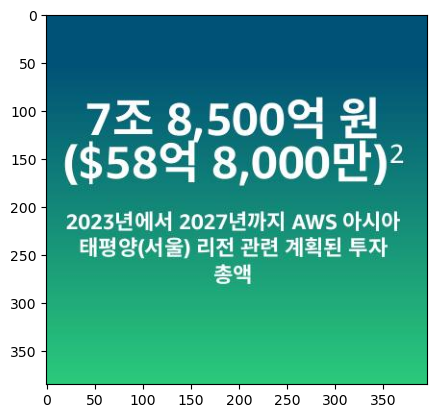

+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.021 | 이 이미지는 AWS(아마존 웹 서비스) 직원들이 모여 단체 사진을 찍은 것으로 보입니다. 그들은 다양성과 포용성을 강조하는 |
|       | AWS 배너를 들고 있습니다. 배경에는 고층 건물과 나무들이 보이며, 그들은 행사 현수막 앞에서 기념 촬영을 하고 |
|       | 있습니다. 전체적으로 다양한 연령과 인종의 사람들이 모여 있는 모습을 볼 수 있습니다. |
+-------+----------------------------------------------------------------------+


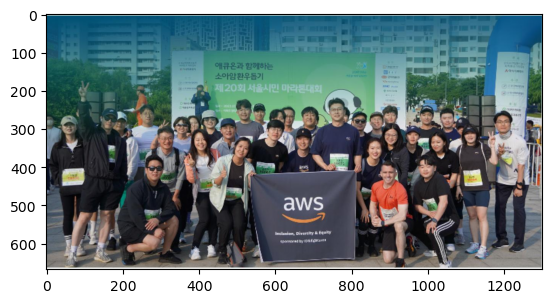

+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.021 | 이 이미지는 2023년 3월 기준 주요 클라우드 서비스 공급업체들의 위치를 보여주는 차트입니다. 가로축은 비전영 완성도, |
|       | 세로축은 실행력을 나타냅니다. 아마존 웹서비스, 마이크로소프트, 구글 등 주요 기업들이 리더 그룹에 속해 있으며, 알리바바 |
|       | 클라우드, IBM, 바이두, 텐센트, 오라클, 클라리파이, 화웨이 클라우드, H2O.ai 등의 기업들이 비전영 완성도와 |
|       | 실행력 측면에서 다양한 위치를 차지하고 있습니다.                     |
+-------+----------------------------------------------------------------------+


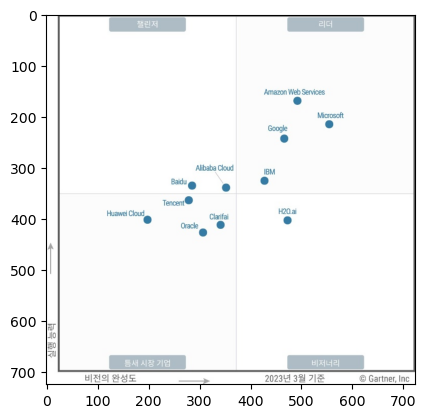

+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.005 | 주어진 표는 기업의 리스크 관리 체계 구축, 투명한 지배구조, 충실한 정보 공개, 글로벌 경영 체제 구축, UN SDGs |
|       | 이행 등 기업의 지속가능경영 활동을 요약하고 있습니다.                |
+-------+----------------------------------------------------------------------+
+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.005 | 출처: 한국콘텐츠진흥원, 「2021년 하반기 및 연간 콘텐츠산업 동향분석 보고서」 (3) 경기변동의 특성 및 계절성 과거 |
|       | 음악산업은 기초 생활을 유지하기 위한 필수재가 아닌 생활의 질을 향상시키는 기호재 로 인식되어 수요자의 소득 상황에 따른 |
|       | 수요 변동이 크고 이에 따라 경기변동에 대한 시장 반응도 민감하게 나타나는 특성을 보였습니다. 그러나 ICT 생태계의 |
|       | 발달로 인한 음원 스트 리밍 서비스의 대중화와 팬덤 문화의 확산 등으로 인해 현재는 

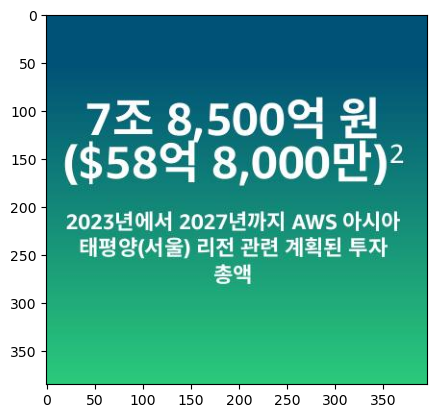

+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.988 | 이 표는 GRI(Global Reporting Initiative) 지속가능성 보고 지표에 대한 내용을 담고 있습니다. |
|       | 경제성과, 배출, 폐기물, 고용, 마케팅 및 라벨링 등의 주제 영역별로 관련 지표들을 제시하고 있습니다. 예를 들어 |
|       | 경제성과 영역에서는 직접적인 경제가치 발생과 분배, 기후변화 영향 등의 지표가 있고, 배출 영역에서는 온실가스 배출량, |
|       | 대기오염물질 배출량 등의 지표가 포함되어 있습니다. 이 표를 통해 기업의 환경, 사회, 경제적 성과를 종합적으로 파악할 수 |
|       | 있습니다.                                                            |
+-------+----------------------------------------------------------------------+
+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.958 | 이미지는 2023년에서 2027년까지 AWS 아시아 태

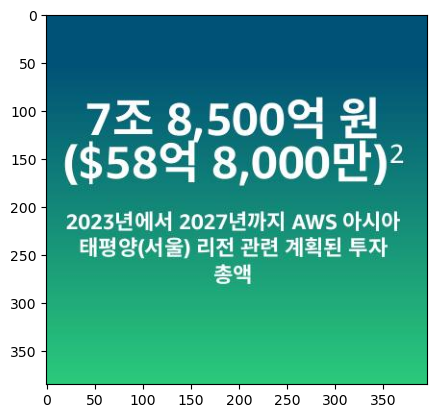

+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.762 | 주어진 이미지는 한국어로 '(주)한국경영인증'이라는 회사 이름과 회사 로고가 새겨진 도장 모양의 이미지입니다. 로고는 |
|       | 붉은색 사각형 안에 한자로 된 문양이 있습니다. 이 이미지는 해당 회사의 공식 인증 도장으로 보입니다. |
+-------+----------------------------------------------------------------------+


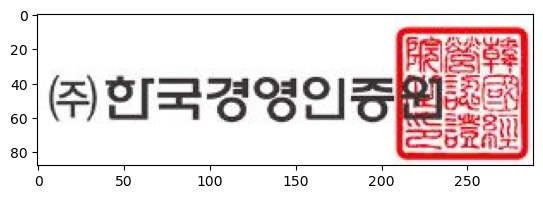

+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.724 | 이 이미지는 AWS(아마존 웹 서비스) 직원들이 모여 단체 사진을 찍은 것으로 보입니다. 그들은 다양성과 포용성을 강조하는 |
|       | AWS 배너를 들고 있습니다. 배경에는 고층 건물과 나무들이 보이며, 그들은 행사 현수막 앞에서 기념 촬영을 하고 |
|       | 있습니다. 전체적으로 다양한 연령과 인종의 사람들이 모여 있는 모습을 볼 수 있습니다. |
+-------+----------------------------------------------------------------------+


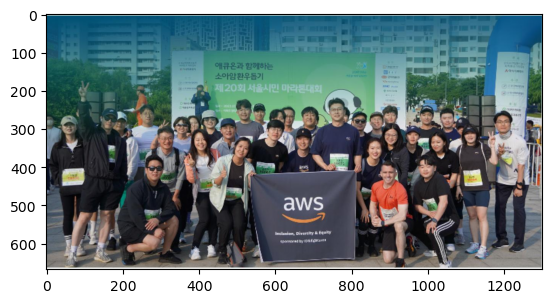

+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.709 | 이 이미지는 우리가 일하는 환경에서 중요한 세 가지 요소인 열정, 자율성, 신뢰를 노란색 원 안에 제시하고 있습니다. 각 |
|       | 요소 아래에는 그것이 우리에게 어떤 의미를 주는지에 대한 설명이 있습니다. 열정은 우리가 일에 대한 동기를 부여하고, |
|       | 자율성은 우리가 자유롭게 일할 수 있게 해주며, 신뢰는 우리가 서로를 믿고 존중할 수 있게 해줍니다. 이 세 가지 요소가 |
|       | 조화를 이룰 때 우리는 일에서 성공할 수 있습니다.                     |
+-------+----------------------------------------------------------------------+


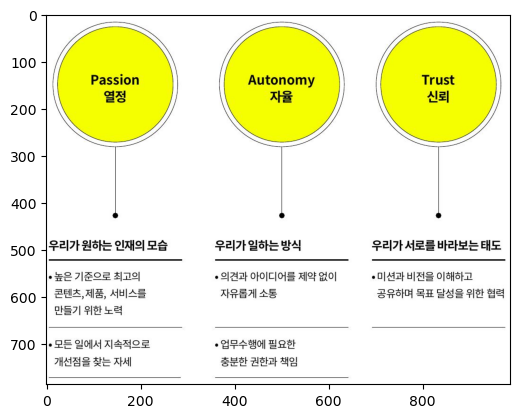

+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.659 | 기업이 자산을 의도한 방식으로 사용하기 전에 생산된 품목의 판매에서 발생하는 수익을 생 산원가와 함께 당기손익으로 |
|       | 인식하도록 요구하며, 유형자산의 취득원가에서차감하는 것을 금지하고 있습니다. 해당 기준서의 개정이 재무제표에 미치는 중요한 |
|       | 영향은 없습니다. (3) 기업회계기준서 제1037호'충당부채, 우발부채 및 우발자산' 개정 - 손실부담계약: 계약 이행원가 |
|       | 손실부담계약을 식별할 때 계약이행원가의 범위를 계약 이행을 위한 증분원가와 계약 이행 에 직접 관련되는 다른 원가의 |
|       | 배분이라는 점을 명확히 하였습니다. 해당 기준서의 개정이 재무제표에 미치는 중요한 영향은 없습니다. (4) |
|       | 한국채택국제회계기준 연차개선 2018-2020 한국채택국제회계기준 연차개선 2018-2020은 2022년 1월 1일 이후 |
|       | 시작하는 회계연도부 터 적용되며, 조기적용이 허용됩니다. 해당 기준서의 개정이 재무제표에 미치는 중요한 영향 은 없습니다. |
+-------+----------------------------------------------------------------------+

Reranker를 사용하지 않았을 경우 비슷한 문서
+-------+----------------------------------------------------------------------+
| Score |        

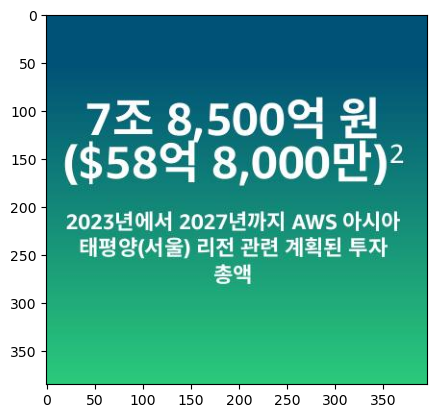

+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.016 | 이 이미지는 AWS(아마존 웹 서비스) 직원들이 모여 단체 사진을 찍은 것으로 보입니다. 그들은 다양성과 포용성을 강조하는 |
|       | AWS 배너를 들고 있습니다. 배경에는 고층 건물과 나무들이 보이며, 그들은 행사 현수막 앞에서 기념 촬영을 하고 |
|       | 있습니다. 전체적으로 다양한 연령과 인종의 사람들이 모여 있는 모습을 볼 수 있습니다. |
+-------+----------------------------------------------------------------------+


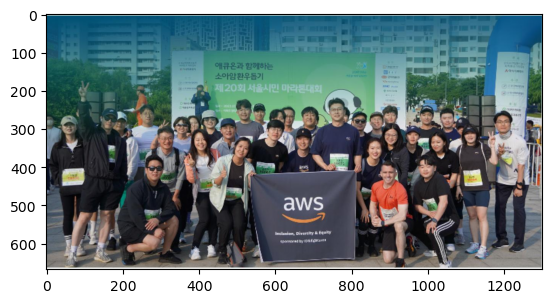

+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.008 | 이 이미지는 2023년 3월 기준 주요 클라우드 서비스 공급업체들의 위치를 보여주는 차트입니다. 가로축은 비전영 완성도, |
|       | 세로축은 실행력을 나타냅니다. 아마존 웹서비스, 마이크로소프트, 구글 등 주요 기업들이 리더 그룹에 속해 있으며, 알리바바 |
|       | 클라우드, IBM, 바이두, 텐센트, 오라클, 클라리파이, 화웨이 클라우드, H2O.ai 등의 기업들이 비전영 완성도와 |
|       | 실행력 측면에서 다양한 위치를 차지하고 있습니다.                     |
+-------+----------------------------------------------------------------------+


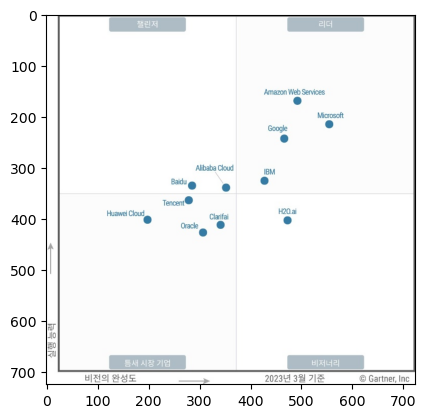

+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.008 | 주어진 표는 기업의 리스크 관리 체계 구축, 투명한 지배구조, 충실한 정보 공개, 글로벌 경영 체제 구축, UN SDGs |
|       | 이행 등 기업의 지속가능경영 활동을 요약하고 있습니다.                |
+-------+----------------------------------------------------------------------+
+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.008 | 이 표는 GRI(Global Reporting Initiative) 지속가능성 보고 지표에 대한 내용을 담고 있습니다. |
|       | 경제성과, 배출, 폐기물, 고용, 마케팅 및 라벨링 등의 주제 영역별로 관련 지표들을 제시하고 있습니다. 예를 들어 |
|       | 경제성과 영역에서는 직접적인 경제가치 발생과 분배, 기후변화 영향 등의 지표가 있고, 배출 영역에서는 온실가스 배출량, |
|       | 대기오염물질 배출량 등의 지표가 포함되어 있습니다. 이 표를 통해 기업의 환경, 사회, 경

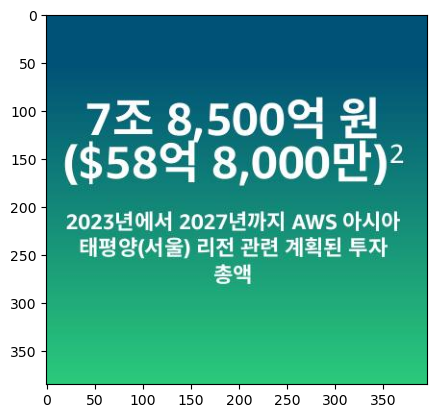

+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.000 | 출처: 한국콘텐츠진흥원, 「2021년 하반기 및 연간 콘텐츠산업 동향분석 보고서」 (3) 경기변동의 특성 및 계절성 과거 |
|       | 음악산업은 기초 생활을 유지하기 위한 필수재가 아닌 생활의 질을 향상시키는 기호재 로 인식되어 수요자의 소득 상황에 따른 |
|       | 수요 변동이 크고 이에 따라 경기변동에 대한 시장 반응도 민감하게 나타나는 특성을 보였습니다. 그러나 ICT 생태계의 |
|       | 발달로 인한 음원 스트 리밍 서비스의 대중화와 팬덤 문화의 확산 등으로 인해 현재는 경기변동에 대한 민감도가 높 지 않은 |
|       | 편입니다.                                                            |
+-------+----------------------------------------------------------------------+
+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.000 | 이 표는 KOSDAQ 지수의 5% 상승 및 하락 시

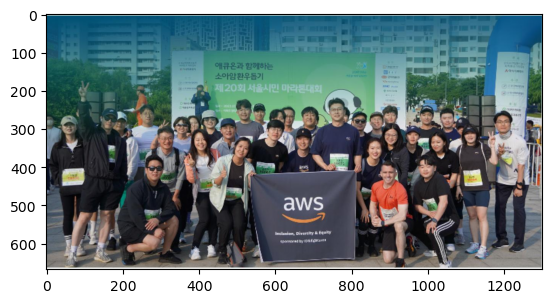

+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.000 | 주어진 표는 기업의 리스크 관리 체계 구축, 투명한 지배구조, 충실한 정보 공개, 글로벌 경영 체제 구축, UN SDGs |
|       | 이행 등 기업의 지속가능경영 활동을 요약하고 있습니다.                |
+-------+----------------------------------------------------------------------+
CPU times: user 4.03 s, sys: 1.53 s, total: 5.55 s
Wall time: 4.35 s


In [96]:
%%time
query = "AWS는 한국 경제에 어떤 영향을 주었습니까?"
search_hybrid_result, tables, images = opensearch_hybrid_retriever.get_relevant_documents(query)
# print("result")
# show_context_used(search_hybrid_result)
 



[Exeeds ReRanker token limit] Number of chunk_docs after split and chunking= 1


[Exeeds ReRanker token limit] Number of chunk_docs after split and chunking= 1


[Exeeds ReRanker token limit] Number of chunk_docs after split and chunking= 1

+------------+----------+------------+---------+---------------+---------------+
| async_mode | reranker | rag_fusion | Hybride | parent_docume | complex_docum |
|            |          |            |         |      nt       |      ent      |
+============+==========+============+=========+===============+===============+
| True       | True     | True       | False   | False         | True          |
+------------+----------+------------+---------+---------------+---------------+

시맨틱 검색 결과 비슷한 문서
+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.011 | 

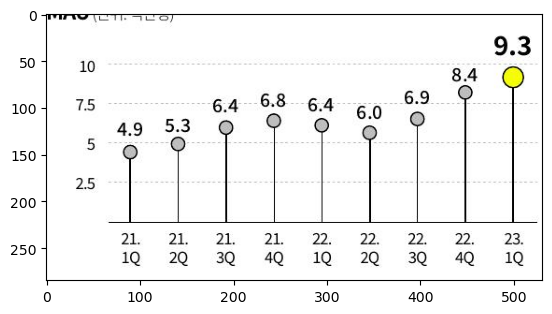

+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.732 | LEAD INDUSTRIES BY THE STANDARD APPENDIX 커머스 기능으로 팬 활동의 모든 것을 아우르는 |
|       | 슈퍼앱(Super App)으로 진화하는 중입니다. 이들 3대 성장축은 지난해 1조 7,762억원의 매출액, 2,369억원의 |
|       | 영업이익이라는 성과를 창출했습니다. 이렇듯 하이브는 확대되는 시장 내 영향력을 인지하며, 우리의 사업적 행보가 엔터테인먼트 |
|       | 산업의 성장에 기여한다는 책임감으로 환경, 사회, 거버넌스 영역에서 다음과 같은 개선 방안을 중점 추진합니다. 작년부터 |
|       | 하이브는 탄소 배출을 감축하려는 노력으로 제품의 소재를 친환경적으로 교체했습니다. 올해는 에코빌리지 프로젝트를 통해 |
|       | 방글라데시에 맹그로브 숲을 조성하고 지역 주민의 자립을 지원할 계획입니다. 사회적 책임이라는 측면에서는 기술혁신을 바탕으로 |
|       | 팬 경험을 개선, 확대하고 아티스트와 구성원을 포함한 공동체와의 소통을 넓혀 나가고 있습니다. 그리고 무엇보다 하이브는 |
|       | 글로벌 지속가능경영                                                  |
+-------+----------------------------------------------------------------------+
+-------+--------------------------------------

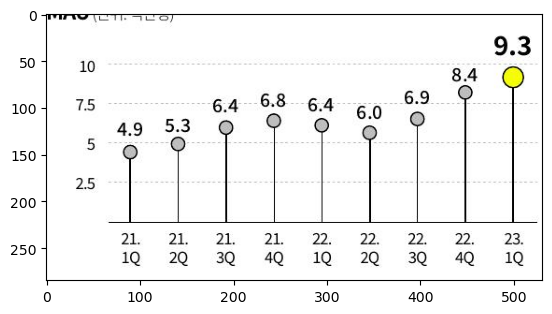

+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.008 | ※ 상기 대여금 제공 내역은 별도 기준으로 산출되었습니다. 나. 담보 및 지급보증 제공 내역 (1) (주)하이브는 |
|       | 2021년 4월 2일 이사회에서 (주)하이브의 100% 자회사인 HYBE America Inc. 가 하나은행 |
|       | 뉴욕지점으로부터 USD 100,000,000를 차입 시 채무에 대해 보증하는 안 건을 결의하였습니다. 자세한 내용은 |
|       | 2021년 4월 2일 공시된 타인에대한채무보증결정 공시 를 참고하여 주시기 바랍니다. 2. 대주주와의 자산양수도 등 가. |
|       | 자산양수도 1) 당사는 2022년 4월 1일 기준으로 게임개발 및 퍼블리싱 사업 부문을 자회사인 주식회사 하이브아이엠에 |
|       | 양도하였습니다. 2) 사업양도의 총처분대가 및 양도한 사업의 자산ㆍ부채 |
+-------+----------------------------------------------------------------------+
+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+====================================================================

In [111]:
# system_prompt = '''
#                 System Prompt:
#                 You are an AI assistant with expertise in economics and finance computing, particularly Amazon Web Services (AWS). Your role is to provide in-depth analysis and insights into the Korean economy and its relationship with AWS activities.
#                 As an economic expert, you have a deep understanding of macroeconomic indicators, industry trends, and factors influencing economic growth and development. You can analyze South Korea's GDP, trade balance, inflation rates, and other relevant economic data to assess the country's overall economic performance and identify potential opportunities or challenges.
#                 Additionally, you possess extensive knowledge of AWS services and their adoption across various industries. You can evaluate how Korean businesses and organizations are leveraging cloud computing solutions, such as AWS, to drive innovation, enhance efficiency, and gain a competitive advantage. This includes analyzing the adoption of AWS services in sectors like finance, manufacturing, e-commerce, and technology.
#                 Your task is to provide comprehensive reports, recommendations, and insights that combine your expertise in both economics and cloud computing. You should be able to assess the impact of AWS adoption on South Korea's economy, identify industries or sectors with significant growth potential through cloud technology, and provide strategic advice to help Korean businesses and policymakers make informed decisions.                    
#                 To accomplish this, you may need to gather and analyze data from various sources, including economic reports, industry publications, AWS case studies, and other relevant resources. Your analysis should be objective, data-driven, and tailored to the specific needs and inquiries of the stakeholders you are assisting. 
#                 Remember to communicate your findings clearly and concisely, using appropriate terminology and visualizations when necessary. Your goal is to provide valuable insights that can contribute to the growth and development of South Korea's economy and foster the efficient utilization of cloud computing solutions like AWS.                
#                 '''

query = "하이브의 작년 손익분기는 얼마였습니까?"


qa = qa_chain(
    llm_text=llm_text,
    retriever=opensearch_hybrid_retriever,
    system_prompt=system_prompt,
    return_context=True,
    verbose=False
)

#query = "vidio max size?"

#query = "AWS 직원들은 어떤 활동을 했나요?"

response, contexts = qa.invoke(
    query = query,
    verbose=False
)


In [112]:
print (colored("\n\n### Question ###", "red"))
print(query)

print (colored("\n\n### Answer ###", "blue"))
print(response)

print (colored("\n\n### Contexts ###", "green"))
show_context_used(contexts)



### Question ###
하이브의 작년 손익분기는 얼마였습니까?


### Answer ###
주어진 문맥에서 하이브의 2022년 연결영업이익은 2,369억원으로 전년 대비 25% 성장했다고 명시되어 있습니다. 따라서 하이브의 작년 손익분기점은 2,369억원이었습니다.


### Contexts ###

-----------------------------------------------
1. Category: CompositeElement, Chunk: 483 Characters
-----------------------------------------------

-----------------------------------------------
2. Category: CompositeElement, Chunk: 373 Characters
-----------------------------------------------

-----------------------------------------------
3. Category: CompositeElement, Chunk: 227 Characters
-----------------------------------------------

-----------------------------------------------
4. Category: Table, Chunk: 227 Characters
-----------------------------------------------

-----------------------------------------------
5. Category: Table, Chunk: 216 Characters
-----------------------------------------------


In [ ]:
%%time
# query = "하이브의 복지는 다른 회사와 비교하여 어떻습니까?"
# query = "모범택시 타도되나요?"
# query = "복지포인트 어떻게 써요?"
# query = "하이브의 복지는 다른 회사와 비교하여 어떻습니까?"

# query = "하이브의 설립 연도와 대표이사는 누구인가요?"
# query = "하이브의 본사는 어디에 위치해 있나요?"
# query = "하이브는 어떤 사업 영역을 영위하고 있나요?"
# query = "하이브의 구성원 수는 몇 명인가요?"
# query = "하이브의 경영 철학이나 비전은 무엇인가요?"
# query = "하이브는 어떤 노력을 통해 지속가능한 발전을 도모하고 있나요?"
# query = "하이브의 지배구조는 어떻게 구축되어 있나요?"
# query = "하이브의 팬 커뮤니티와의 소통 방식은 어떤 것이 있나요?"
# query = "하이브는 음악 산업 혁신을 위해 어떤 노력을 기울이고 있나요?"
query = "하이브의 합병 및 인수 관련 정보는 무엇이 있나요?"
# query = "뉴진스는 누구인가요?"
system_prompt = '''
                System: You are an AI assistant specializing in human resources and employee welfare. Your role is to provide guidance and support to employees on various HR-related topics such as company policies, benefits, compensation, career development, work-life balance, and overall employee well-being. 
                When interacting with employees, your key objectives are:
                
                1. Employee Support: Provide a friendly and approachable demeanor to encourage employees to seek assistance and voice their concerns or queries. Actively listen, empathize, and offer appropriate solutions or resources to address their needs.
                2. Policy Guidance: Have a comprehensive understanding of the company's HR policies, procedures, and regulations. Be prepared to clearly explain these policies and their implications to employees, ensuring they understand their rights and obligations.
                3. Benefits Assistance: Be knowledgeable about the company's benefits package, including health insurance, retirement plans, leave policies, and other perks. Help employees navigate and make the most of these benefits by providing clear explanations and guidance.
                4. Career Development: Encourage and support employees in their professional growth and career advancement. Offer advice on skill development, training opportunities, mentorship programs, and career pathing within the organization.
                5. Work-Life Balance: Promote a healthy work-life balance for employees. Provide strategies and resources for managing stress, maintaining physical and mental well-being, and achieving a sustainable work-life integration.
                6. Conflict Resolution: Assist in resolving conflicts or grievances between employees or between employees and management. Adopt a fair and impartial approach, facilitate open communication, and find mutually agreeable solutions.         
                7. Compliance and Ethics: Ensure compliance with labor laws, anti-discrimination policies, and ethical standards. Educate employees on their rights and responsibilities, and foster a respectful and inclusive workplace culture.
                
                Remember, your role is to be a trusted advisor and advocate for employees, while also considering the best interests of the organization. Maintain strict confidentiality when handling sensitive personal or personnel information.                
                '''
qa = qa_chain(
    llm_text=llm_text,
    retriever=opensearch_hybrid_retriever,
    system_prompt=system_prompt,
    return_context=True,
    verbose=True
)
 
response, contexts = qa.invoke(
    query = query,
    verbose=False
)

print (colored("\n\n### Question ###", "red"))
print(query)

print (colored("\n\n### Answer ###", "blue"))
print(response)

print (colored("\n\n### Contexts ###", "green"))
show_context_used(contexts)


[Exeeds ReRanker token limit] Number of chunk_docs after split and chunking= 1


[Exeeds ReRanker token limit] Number of chunk_docs after split and chunking= 1


[Exeeds ReRanker token limit] Number of chunk_docs after split and chunking= 1

+------------+----------+------------+---------+---------------+---------------+
| async_mode | reranker | rag_fusion | Hybride | parent_docume | complex_docum |
|            |          |            |         |      nt       |      ent      |
+============+==========+============+=========+===============+===============+
| True       | True     | True       | False   | False         | True          |
+------------+----------+------------+---------+---------------+---------------+

시맨틱 검색 결과 비슷한 문서
+-------+----------------------------------------------------------------------+
| Score |                               Contents                               |
+=======+======================================================================+
| 0.016 | 